In [2]:
!ls ..
!pip install seaborn

Makefile		configs      notebooks	       setup.py
README.md		data	     outputs	       src
checkpoints		docker	     pyproject.toml    tests
checkpoints_to_test	ex_lens.png  requirements.txt
checkpoints_tokenizers	logs	     scripts


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
from tqdm import tqdm
from unidecode import unidecode

### Rimes

In [5]:
list_txt_rimes = !find ../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/ -type f -name "*.txt"
list_txt_rimes = list_txt_rimes[3:]
print(list_txt_rimes[:10])

vocab_rimes = dict()
vocab_rimes_words = dict()
len_sequences_rimes = []

print(f'Lines')
for file in tqdm(list_txt_rimes):
  with open(file, 'r') as f:
    line = f.readline()
    
    line = line.replace("°", ".")
    line = line.replace("œ", "oe")
    line = line.replace("¤", "")
    line = line.replace(" €", "€")
    

    for c in str(line):
      if c in vocab_rimes:
        vocab_rimes[c] += 1
      else:
        vocab_rimes[c] = 1

    for word in str(line).split(" "):
      if word in vocab_rimes_words:
        vocab_rimes_words[word] += 1
      else:
        vocab_rimes_words[word] = 1




['../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-1327_000005.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-1035_000001.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-1024_000003.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-1336_000007.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-242_000007.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-150_000003.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/eval2011-11_000003.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-141_000001.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-253_000005.txt', '../data/htr_datasets/RIMES/RIMES-2011-Lines/Transcriptions/train2011-1445_000005.txt']
Lines


  0%|          | 0/12101 [00:00<?, ?it/s]

lieu de 60 €).
lieu de 60€).


  3%|▎         | 324/12101 [00:02<02:10, 90.00it/s] 

un montant de 1500€ (mille cinq cent euros)
un montant de 1500€ (mille cinq cent euros)
Je souhaite désormais verser 45 € chaque mois, au lieu des
Je souhaite désormais verser 45€ chaque mois, au lieu des
45 € par mois sur ce compte.
45€ par mois sur ce compte.


  6%|▌         | 739/12101 [00:07<02:32, 74.54it/s] 

mes versements mensuels à hauteur de 45 € (au
mes versements mensuels à hauteur de 45€ (au


  7%|▋         | 842/12101 [00:09<03:52, 48.41it/s]

demande de payer 82 € par mois pendant 24
demande de payer 82€ par mois pendant 24


  8%|▊         | 911/12101 [00:13<11:10, 16.69it/s]

demande donc de ne plus verser 60 € par mois
demande donc de ne plus verser 60€ par mois


 10%|▉         | 1164/12101 [00:21<05:23, 33.77it/s]

1500 € d'actions. Je vous laisse choisir les meilleurs placements
1500€ d'actions. Je vous laisse choisir les meilleurs placements


 10%|█         | 1265/12101 [00:24<06:02, 29.91it/s]

permettant momentanément de verser 45€ par mois au lieu de 60 sans prendre
permettant momentanément de verser 45€ par mois au lieu de 60 sans prendre


 12%|█▏        | 1410/12101 [00:35<13:32, 13.17it/s]

mois et la TV coûte aussi 60 € par mois pendant
mois et la TV coûte aussi 60€ par mois pendant


 13%|█▎        | 1525/12101 [00:38<05:06, 34.53it/s]

bourse, et ce pour un montant de 1500 €.
bourse, et ce pour un montant de 1500€.


 14%|█▍        | 1694/12101 [00:42<04:00, 43.30it/s]

60 € actuels. Merci d'appliquer cette modification à compter
60€ actuels. Merci d'appliquer cette modification à compter


 15%|█▍        | 1805/12101 [00:47<07:30, 22.84it/s]

d'épargne logement d'un montant de 60 €
d'épargne logement d'un montant de 60€


 17%|█▋        | 2075/12101 [00:55<06:14, 26.77it/s]

50,00 €.
50,00€.


 19%|█▉        | 2271/12101 [00:58<03:07, 52.42it/s]

sur mon PEL de 60 € mensuels à 45 € mensuel
sur mon PEL de 60€ mensuels à 45€ mensuel


 20%|█▉        | 2389/12101 [01:01<02:54, 55.58it/s]

la différence (127 €) soit portée à mon crédit pour une future
la différence (127€) soit portée à mon crédit pour une future


 20%|██        | 2477/12101 [01:04<03:32, 45.33it/s]

est supérieur de 20,40 € et je vous serais  grès
est supérieur de 20,40€ et je vous serais  grès


 23%|██▎       | 2817/12101 [01:12<03:32, 43.61it/s]

de passer de 60 à 45 €)
de passer de 60 à 45€)


 24%|██▍       | 2957/12101 [01:15<03:55, 38.89it/s]

référence CH45-2 d'une valeur de 87 €. Je souhaite que
référence CH45-2 d'une valeur de 87€. Je souhaite que


 26%|██▌       | 3122/12101 [01:21<06:51, 21.79it/s]

et me facturer 135 €!
et me facturer 135€!


 26%|██▋       | 3188/12101 [01:22<04:01, 36.86it/s]

Je vous joins un chèque d'un montant de 5€ pour le complé-
Je vous joins un chèque d'un montant de 5€ pour le complé-


 29%|██▉       | 3489/12101 [01:29<03:13, 44.58it/s]

boursières pour un montant de 1500€. Je vous charge
boursières pour un montant de 1500€. Je vous charge


 30%|██▉       | 3618/12101 [01:32<03:24, 41.42it/s]

montant de 435,85 €.
montant de 435,85€.


 30%|███       | 3651/12101 [01:33<03:28, 40.46it/s]

en une seule fois les 25 € de frais de mensualisation.
en une seule fois les 25€ de frais de mensualisation.


 33%|███▎      | 4001/12101 [01:41<03:53, 34.73it/s]

un montant d'environs 3000 €.
un montant d'environs 3000€.


 34%|███▍      | 4100/12101 [01:45<06:36, 20.20it/s]

s'élève à un montant de 175,13 € (vous en trouverez une
s'élève à un montant de 175,13€ (vous en trouverez une


 37%|███▋      | 4474/12101 [01:53<03:28, 36.58it/s]

Je veux en effet investir un montant de 1500 € en actions
Je veux en effet investir un montant de 1500€ en actions


 38%|███▊      | 4541/12101 [01:55<03:13, 39.08it/s]

Je transmets mon nouveau chèque : 46 €
Je transmets mon nouveau chèque : 46€


 39%|███▉      | 4709/12101 [02:00<02:59, 41.11it/s]

facilité de paiement. Je vous dois aujourd'hui 5000 € et j'aimerai
facilité de paiement. Je vous dois aujourd'hui 5000€ et j'aimerai


 41%|████▏     | 5012/12101 [02:08<03:16, 36.01it/s]

pour un montant de 1500 €.
pour un montant de 1500€.


 43%|████▎     | 5211/12101 [02:15<05:05, 22.58it/s]

automobile, d'un montant de 2300 €.
automobile, d'un montant de 2300€.


 43%|████▎     | 5256/12101 [02:17<05:06, 22.36it/s]

je dispose dans votre établissement, je souhaite passer à des mensualités de 45 €.
je dispose dans votre établissement, je souhaite passer à des mensualités de 45€.


 45%|████▍     | 5403/12101 [02:21<03:21, 33.26it/s]

de 60 € - pour ne plus verser que
de 60€ - pour ne plus verser que


 47%|████▋     | 5704/12101 [02:26<01:48, 58.82it/s]

désirerai verser plus que 45 €.
désirerai verser plus que 45€.


 47%|████▋     | 5715/12101 [02:27<02:21, 45.25it/s]

A ce jour j'effectuais des versements de 60 €, je
A ce jour j'effectuais des versements de 60€, je


 50%|████▉     | 6050/12101 [02:28<00:27, 216.74it/s]

je versais 60 €/mois et je souhaiterais passer à 45 €/mois.
je versais 60€/mois et je souhaiterais passer à 45€/mois.


 50%|█████     | 6107/12101 [02:29<00:47, 126.64it/s]

Après avoir versé durant deux ans des mensualités de 60 € sur le PEL dont
Après avoir versé durant deux ans des mensualités de 60€ sur le PEL dont


 51%|█████     | 6149/12101 [02:30<01:00, 98.16it/s] 

depuis le 1e janvier 2004 ou j'ai déposé un capital de 10 000 €
depuis le 1e janvier 2004 ou j'ai déposé un capital de 10 000€
Vous pouvez prélever les 1500 € sur mon compte
Vous pouvez prélever les 1500€ sur mon compte


 51%|█████▏    | 6220/12101 [02:33<01:52, 52.11it/s]

Pensez-vous qu'il soit mieux de placer les 1500 € en un
Pensez-vous qu'il soit mieux de placer les 1500€ en un


 53%|█████▎    | 6376/12101 [02:36<02:23, 39.97it/s]

plus me permettre de verser 60 € sur mon PEL. Ainsi, je
plus me permettre de verser 60€ sur mon PEL. Ainsi, je


 55%|█████▍    | 6615/12101 [02:40<01:44, 52.74it/s]

voudrais réduire à 45 € mensuel. Je vous
voudrais réduire à 45€ mensuel. Je vous


 57%|█████▋    | 6895/12101 [02:43<01:13, 70.96it/s] 

45 €.
45€.


 58%|█████▊    | 7027/12101 [02:46<01:55, 44.08it/s]

Vous trouverez, joint à cette lettre, un chèque de 28,30 €
Vous trouverez, joint à cette lettre, un chèque de 28,30€


 59%|█████▊    | 7101/12101 [02:49<02:30, 33.13it/s]

Ayant vu votre offre promotionnelle à 19,80 € par mois,
Ayant vu votre offre promotionnelle à 19,80€ par mois,


 60%|█████▉    | 7220/12101 [02:51<01:54, 42.59it/s]

à 45€ (quarante-cinq euros) par mois.
à 45€ (quarante-cinq euros) par mois.
Logement. Je souhaite passer de 60 € à 45 € de versements mensuels.
Logement. Je souhaite passer de 60€ à 45€ de versements mensuels.


 61%|██████    | 7322/12101 [02:54<02:20, 34.00it/s]

de 0.5 €.
de 0.5€.


 62%|██████▏   | 7553/12101 [03:00<01:41, 44.70it/s]

Je verse actuellement 60 € par mois, et je
Je verse actuellement 60€ par mois, et je


 63%|██████▎   | 7622/12101 [03:02<01:48, 41.11it/s]

J'ai bien reçu l'avis d'imposition me réclamant la somme de 2 000 € au
J'ai bien reçu l'avis d'imposition me réclamant la somme de 2 000€ au


 66%|██████▌   | 7952/12101 [03:14<02:50, 24.32it/s]

de 1500 €.
de 1500€.


 66%|██████▌   | 7991/12101 [03:14<01:42, 40.07it/s]

à 45 € mensuels (au lieu de 60 € mensuels actuellement).
à 45€ mensuels (au lieu de 60€ mensuels actuellement).


 70%|██████▉   | 8463/12101 [03:24<01:10, 51.90it/s]

350 €, 10 x 35 € valeur de l'action garantie
350€, 10 x 35€ valeur de l'action garantie


 74%|███████▍  | 9009/12101 [03:42<02:06, 24.46it/s]

sont élevées et à  celà  s'ajoutent un loyer mensuel (500 €) ainsi que
sont élevées et à  celà  s'ajoutent un loyer mensuel (500€) ainsi que


 77%|███████▋  | 9291/12101 [03:50<01:15, 37.29it/s]

Je souhaiterais que vous placiez pour moi pour 1500 €
Je souhaiterais que vous placiez pour moi pour 1500€


 77%|███████▋  | 9313/12101 [03:51<01:25, 32.52it/s]

la somme de 93€20, cependant ma dernière facture indique un
la somme de 93€20, cependant ma dernière facture indique un


 78%|███████▊  | 9406/12101 [03:53<01:02, 42.89it/s]

n'excédait pas 300 €.
n'excédait pas 300€.


 78%|███████▊  | 9486/12101 [03:55<01:23, 31.15it/s]

ai commandé pour 1200€ d'actions
ai commandé pour 1200€ d'actions


 80%|███████▉  | 9628/12101 [04:00<01:40, 24.71it/s]

montant de 122€10. Vous trouverez ci-joint une photocopie de la
montant de 122€10. Vous trouverez ci-joint une photocopie de la


 81%|████████  | 9792/12101 [04:02<00:47, 48.50it/s]

15 € TTC
15€ TTC


 82%|████████▏ | 9900/12101 [04:05<00:56, 39.20it/s]

20 € TTC
20€ TTC


 82%|████████▏ | 9937/12101 [04:06<00:55, 39.25it/s]

somme de 1500 € en actions boursières. En effet je souhaite
somme de 1500€ en actions boursières. En effet je souhaite


 83%|████████▎ | 10070/12101 [04:13<02:28, 13.63it/s]

de 1500 €. Je vous accorde toute ma confiance afin que vous effectuiez
de 1500€. Je vous accorde toute ma confiance afin que vous effectuiez


 84%|████████▍ | 10144/12101 [04:15<01:42, 19.18it/s]

pack de 10 CD vierges, réf : DX3485, prix unitaire : 15,00 €,
pack de 10 CD vierges, réf : DX3485, prix unitaire : 15,00€,


 85%|████████▌ | 10328/12101 [04:21<00:53, 33.14it/s]

quantité : 30, montant : 450,00 €
quantité : 30, montant : 450,00€


 86%|████████▌ | 10392/12101 [04:23<01:04, 26.44it/s]

de 5000 € sur 4 ans et 5 mois, soit 53 mensualités à rembour-
de 5000€ sur 4 ans et 5 mois, soit 53 mensualités à rembour-


 87%|████████▋ | 10481/12101 [04:25<00:44, 36.74it/s]

je souhaitais acquérir 25 actions 'People " d'un montant de 150 €.
je souhaitais acquérir 25 actions 'People " d'un montant de 150€.


 87%|████████▋ | 10555/12101 [04:27<00:33, 45.73it/s]

+ 5 € frais de port
+ 5€ frais de port


 90%|████████▉ | 10846/12101 [04:33<00:27, 45.35it/s]

ne vaut entairenement pas les 200€ que j'ai payés. Ce n'est pas
ne vaut entairenement pas les 200€ que j'ai payés. Ce n'est pas


 90%|█████████ | 10944/12101 [04:37<00:42, 27.07it/s]

montant total de 357,42 €.
montant total de 357,42€.


 91%|█████████ | 10964/12101 [04:38<00:40, 27.90it/s]

J'ai bien reçu votre facture d'un montant de 123 €
J'ai bien reçu votre facture d'un montant de 123€


 91%|█████████ | 11009/12101 [04:41<01:06, 16.36it/s]

action d'une valeur de 1500 €. Nous avions
action d'une valeur de 1500€. Nous avions


 94%|█████████▍| 11381/12101 [04:50<00:23, 30.21it/s]

enregistreur de DVD au prix de 299 €. Afin que
enregistreur de DVD au prix de 299€. Afin que


 99%|█████████▊| 11920/12101 [05:07<00:03, 59.13it/s]

provision de 400 € afin de régler les chèques en cours.
provision de 400€ afin de régler les chèques en cours.


100%|█████████▉| 12059/12101 [05:11<00:01, 32.11it/s]

adidash taille 44 d'un montant de 75 € port compris.
adidash taille 44 d'un montant de 75€ port compris.


100%|██████████| 12101/12101 [05:13<00:00, 38.60it/s]


In [ ]:
print(pd.DataFrame(np.array(len_sequences_rimes)).describe())

         0
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN


In [ ]:
print(sorted(vocab_rimes))
print(len(vocab_rimes))

[' ', '!', '"', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '²', 'À', 'É', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ô', 'ù', 'û', '€']
97


In [6]:
# unidecoded_rimes
vocab_rimes_unidecoded = dict()
map_unidecoded_rimes = dict()

for k, v in vocab_rimes.items():
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_rimes_unidecoded:
    vocab_rimes_unidecoded[k_unidecoded] += v
  else:
    vocab_rimes_unidecoded[k_unidecoded] = v
    map_unidecoded_rimes[k_unidecoded] = k
    
# if 'oe' in vocab_rimes_unidecoded:
del vocab_rimes_unidecoded['oe']
    
print(sorted(vocab_rimes_unidecoded))
print(vocab_rimes_unidecoded)
print(len(vocab_rimes_unidecoded))

print(map_unidecoded_rimes)

KeyError: 'oe'

### IAM

In [85]:
!pip install ET

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [86]:
import xml.etree.ElementTree as ET

list_txt_iam = !find ../data/htr_datasets/IAM/ -type f -name "*.xml"
list_txt_iam = list_txt_iam[3:]

vocab_IAM = dict()
vocab_IAM_words = dict()
len_sequences_IAM = []

for file in list_txt_iam:
  tree = ET.parse(file)
  root = tree.getroot()

  for line in root.iter("line"):
    text = line.attrib.get("text")
    text = text.replace("&quot", "\"")
    # print(f'Text: {text}')
    len_sequences_IAM.append(len(text))
    for c in str(text):
      if c in vocab_IAM:
        vocab_IAM[c] += 1
      else:
        vocab_IAM[c] = 1

    # print(f'Text split by space: {str(text).split(" ")}')
    for word in str(text).split(" "):
      # print(f'Word: {word}')
      if word in vocab_IAM_words:
        vocab_IAM_words[word] += 1
      else:
        vocab_IAM_words[word] = 1


print(vocab_IAM)
print(len(sorted(vocab_IAM)))
print(sorted(vocab_IAM))

{'W': 727, 'i': 30238, 't': 39890, 'h': 25182, ' ': 87102, 's': 27821, 'o': 33268, 'm': 10657, 'e': 56781, 'n': 30962, 'g': 8631, 'f': 9987, 'a': 35809, 'r': 27458, 'I': 1598, 'b': 6788, 'd': 17911, 'w': 8774, "'": 1984, 'u': 12179, '.': 6215, '"': 1627, ';': 1613, 'M': 1144, 'y': 8251, 'k': 2814, 'A': 1254, 'p': 8275, 'l': 18007, ',': 5615, 'D': 568, '?': 259, 'K': 163, 'T': 1647, 'c': 11808, 'Y': 227, 'S': 1062, 'B': 853, 'P': 720, 'H': 986, 'L': 637, '-': 1543, 'F': 489, 'x': 785, 'v': 4516, 'G': 661, '(': 203, 'N': 710, '1': 494, '5': 157, '3': 174, '7': 64, '4': 118, ')': 200, 'E': 674, 'R': 606, 'j': 423, '!': 226, 'C': 750, 'V': 170, 'q': 370, ':': 164, 'O': 469, '9': 179, '8': 118, '#': 79, '2': 209, '6': 121, '0': 431, '*': 14, 'z': 205, 'U': 189, 'J': 180, '&': 55, 'Q': 16, 'X': 8, 'Z': 10, '+': 9, '/': 16}
79
[' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G

In [87]:
# unidecoded IAM
vocab_IAM_unidecoded = dict()
map_unidecoded_IAM = dict()

for k, v in vocab_IAM.items():
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_IAM_unidecoded:
    vocab_IAM_unidecoded[k_unidecoded] += v
  else:
    vocab_IAM_unidecoded[k_unidecoded] = v
    map_unidecoded_IAM[k_unidecoded] = k
    
print(sorted(vocab_IAM_unidecoded))
print(vocab_IAM_unidecoded)
print(len(vocab_IAM_unidecoded))

print(map_unidecoded_IAM)


[' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'W': 727, 'i': 30238, 't': 39890, 'h': 25182, ' ': 87102, 's': 27821, 'o': 33268, 'm': 10657, 'e': 56781, 'n': 30962, 'g': 8631, 'f': 9987, 'a': 35809, 'r': 27458, 'I': 1598, 'b': 6788, 'd': 17911, 'w': 8774, "'": 1984, 'u': 12179, '.': 6215, '"': 1627, ';': 1613, 'M': 1144, 'y': 8251, 'k': 2814, 'A': 1254, 'p': 8275, 'l': 18007, ',': 5615, 'D': 568, '?': 259, 'K': 163, 'T': 1647, 'c': 11808, 'Y': 227, 'S': 1062, 'B': 853, 'P': 720, 'H': 986, 'L': 637, '-': 1543, 'F': 489, 'x': 785, 'v': 4516, 'G': 661, '(': 203, 'N': 710, '1': 494, '5': 157, '3': 174, '7': 64, '4': 118, ')': 200, 'E': 674, 'R': 

In [ ]:
with open('../data/htr_datasets/vocab_IAM.txt', 'w') as f:
  for word, freq in sorted(vocab_IAM_words.items(), key=lambda x: x[0], reverse=False):
    f.write(f'{word}-{freq}\n')
# for word, freq in sorted(vocab_IAM_words.items(), key=lambda x: x[0], reverse=False).items():
  # print(f'Word: {word} - Frequency: {freq}')

In [ ]:
# sb.violinplot(x=pd.DataFrame(np.array(len_sequences_IAM))[0])

In [ ]:
sorted(vocab_IAM_words.items(), key=lambda x: x[1], reverse=True)

with open(f'words_iam.txt', 'w') as f:
  for word, freq in sorted(vocab_IAM_words.items(), key=lambda x: x[1], reverse=True):
    f.writelines(f'{word}:{freq}\n')

### ICFHR 2016

In [ ]:
!pip install beautifulsoup4
!pip install lxml
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [29]:
from bs4 import BeautifulSoup
import re 
from unidecode import unidecode

vocab_icfhr_2016 = dict()

# list_txt_icfhr_2016 = !find ../data/htr_datasets/icfhr_2016_orig/ -type f -name "*.xml"
# print(len(list_txt_icfhr_2016))
# len_sequences_icfhr_2016 = []

# Read transcriptions from ICFHR 2016 in icfhr_2016/transcriptions/transcriptions.txt

with open('../data/htr_datasets/icfhr_2016/transcriptions/transcriptions.txt', 'r') as f:
    lines = f.readlines()
    
    for line in lines: # Remove \n
      line = line.replace('\n', '')
      line = line.replace("¾", "3/4")
      line = line.replace("ß", "B")
      line = line.replace("—", "-")

      
      # text = line.split(' ')[1]
      text = line
      
      # print(f'Text: {text}')

      for c in str(text):
        if c in vocab_icfhr_2016:
          vocab_icfhr_2016[c] += 1
        else:
          vocab_icfhr_2016[c] = 1
 
print(sorted(vocab_icfhr_2016))
print(len(sorted(vocab_icfhr_2016)))

for c in sorted(vocab_icfhr_2016):
  print(f'{c}:{unidecode(c)}')
  
ord_ = ord("—")
ord__ = ord("-")

print(f'Ord: {ord_}')
print(f'Ord_: {ord__}')


--Seite0001_1 Bestett- vnd Ersetz
--Seite0041_16 -: 50 fl.
--Seite0060_3 Zūm Rütter. des Statt- vnd 
--Seite0065_15 Freyherrn etc. herrn Statt- vnd 
--Seite0070_25 -: 3 fl.
--Seite0072_22 Hilff -. 4 fl.
--Seite0074_17 das stär P -: 1 fl. 48 k.
--Seite0074_18 Der schlechtern -: 1 fl. 36 k.
--Seite0074_20 ain stär P -: 1 fl. 48 k.
--Seite0074_21 der schlechtern -: 1 fl. 36 k.
--Seite0075_8 P -: 24 k.
--Seite0075_9 Der schlechtern: 1 L. - 20 k.
--Seite0075_10 Zibeben. 1 L. -: 10 k.
--Seite0075_11 Weinberlen. 1 L. -: 8 k.
--Seite0075_12 Feigen der gūeten 1 L. -: 6 k.
--Seite0076_1 Der schlechtern -: 5 k.
--Seite0076_2 Visoln. 1 L. P -: 4 k.
--Seite0083_24 Tax -: 25 fl.
--Seite0089_3 Tax -: 25 fl.
--Seite0095_15 - vnd verleichūng Aines Edlen Fleckhs.
--Seite0099_19 -: 10 fl.
--Seite0101_30 -: 75 fl.
--Seite0104_15 Tax. -: 25 fl.
--Seite0157_10 vermig der vorigen Er-
--Seite0157_12 das soll Er hiemit Aūfer-
--Seite0157_15 Vnd letstens den Anheūt aūfer-
--Seite0158_20 hansen Waldner. Jos-
--S

In [9]:
# sb.violinplot(x=pd.DataFrame(np.array(len_sequences_icfhr_2016))[0])

In [30]:
# unidecoded icfhr_2016
vocab_icfhr_2016_unidecoded = dict()
map_unidecoded_icfhr_2016 = dict()

for k, v in vocab_icfhr_2016.items():
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_icfhr_2016_unidecoded:
    vocab_icfhr_2016_unidecoded[k_unidecoded] += v
  else:
    vocab_icfhr_2016_unidecoded[k_unidecoded] = v
    map_unidecoded_icfhr_2016[k_unidecoded] = k
    
  # del \n character
  if k_unidecoded == '\n' or k_unidecoded == '':
    del vocab_icfhr_2016_unidecoded[k_unidecoded]
    del map_unidecoded_icfhr_2016[k_unidecoded]
  
print(sorted(vocab_icfhr_2016_unidecoded))
print(vocab_icfhr_2016_unidecoded)
print(len(vocab_icfhr_2016_unidecoded))

print(map_unidecoded_icfhr_2016)

[' ', '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'S': 11547, 'e': 46961, 'i': 22076, 't': 20211, '0': 16198, '1': 10534, '_': 10332, ' ': 35873, '6': 3084, '2': 7949, 'B': 677, 's': 10960, '-': 55, 'v': 2781, 'n': 20496, 'd': 7892, 'E': 846, 'r': 14232, 'z': 987, 'u': 5582, 'g': 6094, '.': 5110, 'a': 12023, 'm': 4153, 'R': 775, '3': 5694, 'o': 5105, 'f': 3739, 'b': 4165, '4': 4476, 'l': 7327, 'J': 355, '/': 9, '5': 3227, 'D': 392, 'H': 658, 'A': 2251, ':': 853, '7': 2882, 'c': 5044, 'K': 387, 'h': 8440, '8': 2953, 'y': 301, 'Z': 1317, 'L': 597, 'G': 642, '9': 2898, 'F': 304, 'N': 174, 'p': 218, 'T': 455, 'P': 1442, 'C': 551, 'j': 121, 'O': 86, 'V': 263, 'W': 688, 

### Washington

In [31]:
## Read data washington
def convert_text_washington(text):
    text = text.replace("-", "").replace("|", " ")
    text = text.replace("s_pt", ".").replace("s_cm", ",")
    text = text.replace("s_mi", "-").replace("s_qo", ":")
    text = text.replace("s_sq", ";").replace("s_et", "V")
    text = text.replace("s_bl", "(").replace("s_br", ")")
    text = text.replace("s_qt", "'").replace("s_GW", "G.W.")
    text = text.replace("s_", "")
    return text

In [32]:
vocab_washington = dict()
len_sequences_washington = []

with open(f'../data/htr_datasets/washington/washingtondb-v1.0/ground_truth/transcription.txt') as f:
  transcriptions = f.readlines()

  for line in transcriptions:
    line = line.split(" ")[1]
    line = convert_text_washington(line)
    len_sequences_washington.append(len(line))
    # print(line)

    for c in str(line):
      if c in vocab_washington:
        vocab_washington[c] += 1
      else:
        vocab_washington[c] = 1

del vocab_washington['\n']
print(sorted(vocab_washington))
print(vocab_washington)
print(len(sorted(vocab_washington)))




[' ', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'2': 34, '7': 49, '0': 17, '.': 358, ' ': 4238, 'L': 39, 'e': 2712, 't': 1946, 'r': 1538, 's': 1111, ',': 336, 'O': 67, 'd': 727, 'a': 1502, 'n': 1361, 'I': 99, 'u': 644, 'c': 549, 'i': 1279, 'o': 1664, 'b': 303, '1': 65, '5': 83, 'l': 664, 'y': 448, 'f': 397, 'h': 1067, 'p': 390, 'k': 78, '-': 173, 'm': 576, 'Y': 40, 'w': 322, 'B': 39, 'F': 44, 'A': 54, 'W': 70, 'g': 365, 'C': 157, 'R': 66, ';': 68, 'v': 214, 'P': 23, 'S': 85, "'": 8, 'N': 8, '6': 13, 'G': 39, '8': 10, ':': 39, 'H': 35, 'T': 61, 'D': 58, 'z': 14, 'M': 32, 'E': 20, 'V': 47, 'x': 45, 'j': 17, '(': 5, ')': 4, 'q': 16, '3': 12, '9': 8, '4': 2, 'K': 5, 'J': 9, 'Q': 3}
68


In [33]:
# unidecoded washington
vocab_washington_unidecoded = dict()
map_unidecoded_washington = dict()

for k, v in vocab_washington.items():
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_washington_unidecoded:
    vocab_washington_unidecoded[k_unidecoded] += v
  else:
    vocab_washington_unidecoded[k_unidecoded] = v
    map_unidecoded_washington[k_unidecoded] = k
    
# del vocab_washington_unidecoded['\n']
# del map_unidecoded_washington['\n']

print(sorted(vocab_washington_unidecoded))
print(vocab_washington_unidecoded)
print(len(vocab_washington_unidecoded))


[' ', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'2': 34, '7': 49, '0': 17, '.': 358, ' ': 4238, 'L': 39, 'e': 2712, 't': 1946, 'r': 1538, 's': 1111, ',': 336, 'O': 67, 'd': 727, 'a': 1502, 'n': 1361, 'I': 99, 'u': 644, 'c': 549, 'i': 1279, 'o': 1664, 'b': 303, '1': 65, '5': 83, 'l': 664, 'y': 448, 'f': 397, 'h': 1067, 'p': 390, 'k': 78, '-': 173, 'm': 576, 'Y': 40, 'w': 322, 'B': 39, 'F': 44, 'A': 54, 'W': 70, 'g': 365, 'C': 157, 'R': 66, ';': 68, 'v': 214, 'P': 23, 'S': 85, "'": 8, 'N': 8, '6': 13, 'G': 39, '8': 10, ':': 39, 'H': 35, 'T': 61, 'D': 58, 'z': 14, 'M': 32, 'E': 20, 'V': 47, 'x': 45, 'j': 17, '(': 5, ')': 4, 'q': 16, '3': 12, '9': 8, '4': 2, 'K': 5, 'J': 9, 'Q': 3}
68


<Axes: xlabel='0'>

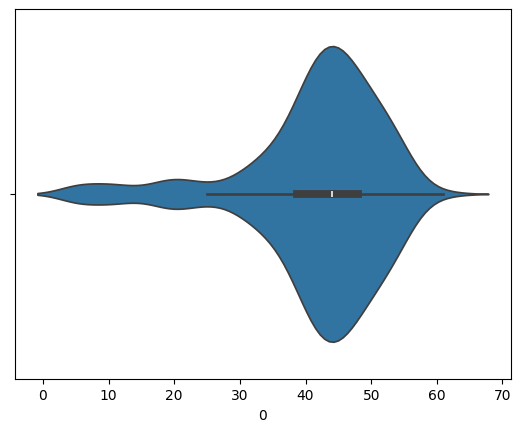

In [ ]:
# sb.violinplot(x=pd.DataFrame(np.array(len_sequences_washington))[0])

### Saint-Gall

In [34]:
vocab_saint_gall = dict()
len_sequences_saint_gall = []


with open(f'../data/htr_datasets/saint_gall/saintgalldb-v1.0/ground_truth/transcription.txt') as f:

  transcriptions = f.readlines()

  for line in transcriptions:
    line = line.split(" ")[1]
    line = line.replace("-", "").replace("|", " ")
    line = line.replace("pt", ".")
    line = line.replace("et", "α")
    len_sequences_saint_gall.append(len(line))
    # print(line)

    for c in str(line):
      if c in vocab_saint_gall:
        vocab_saint_gall[c] += 1
      else:
        vocab_saint_gall[c] = 1

print(sorted(vocab_saint_gall))
print(len(sorted(vocab_saint_gall)))
print(vocab_saint_gall)


[' ', '.', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'α']
50
{'v': 1060, 'e': 6859, 'r': 4563, 's': 5000, 'a': 5328, 't': 4796, 'i': 8041, 'o': 3738, ' ': 10665, 'p': 1825, 'm': 3150, 'n': 4188, 'h': 407, 'b': 1057, 'c': 2767, 'l': 2176, 'α': 776, 'u': 5171, '.': 823, 'd': 2301, 'g': 744, 'q': 738, 'f': 601, 'x': 280, 'P': 73, 'D': 75, 'S': 115, 'G': 17, 'O': 58, 'Q': 58, 'E': 228, 'U': 91, 'M': 65, 'H': 58, 'A': 93, 'C': 101, 'R': 61, 'N': 68, 'T': 95, 'I': 200, 'B': 23, 'F': 19, 'L': 28, 'X': 9, 'V': 35, 'z': 7, 'w': 9, 'y': 17, 'Z': 1, 'k': 2}


In [35]:
# unidecoded saint_gall

vocab_saint_gall_unidecoded = dict()
map_unidecoded_saint_gall = dict()

for k, v in vocab_saint_gall.items():
  if k == 'α':
    print(f'Found α. Unidecoded: α: {unidecode(k)}')
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_saint_gall_unidecoded:
    vocab_saint_gall_unidecoded[k_unidecoded] += v
  else:
    vocab_saint_gall_unidecoded[k_unidecoded] = v
    map_unidecoded_saint_gall[k_unidecoded] = k
    
print(sorted(vocab_saint_gall_unidecoded))
print(len(vocab_saint_gall_unidecoded))
print(vocab_saint_gall_unidecoded)

print(map_unidecoded_saint_gall)


Found α. Unidecoded: α: a
[' ', '.', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
49
{'v': 1060, 'e': 6859, 'r': 4563, 's': 5000, 'a': 6104, 't': 4796, 'i': 8041, 'o': 3738, ' ': 10665, 'p': 1825, 'm': 3150, 'n': 4188, 'h': 407, 'b': 1057, 'c': 2767, 'l': 2176, 'u': 5171, '.': 823, 'd': 2301, 'g': 744, 'q': 738, 'f': 601, 'x': 280, 'P': 73, 'D': 75, 'S': 115, 'G': 17, 'O': 58, 'Q': 58, 'E': 228, 'U': 91, 'M': 65, 'H': 58, 'A': 93, 'C': 101, 'R': 61, 'N': 68, 'T': 95, 'I': 200, 'B': 23, 'F': 19, 'L': 28, 'X': 9, 'V': 35, 'z': 7, 'w': 9, 'y': 17, 'Z': 1, 'k': 2}
{'v': 'v', 'e': 'e', 'r': 'r', 's': 's', 'a': 'a', 't': 't', 'i': 'i', 'o': 'o', ' ': ' ', 'p': 'p', 'm': 'm', 'n': 'n', 'h': 'h', 'b': 'b', 'c': 'c', 'l': 'l', 'u': 'u', '.': '.', 'd': 'd', 'g': 'g', 'q': 'q', 'f': 'f', 'x': 'x', 'P': 'P', 'D

### Bentham

In [92]:
vocab_bentham = dict()

import re

list_txt_bentham = !find ../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions -type f -name "*.txt" 
print(list_txt_bentham[:10])

vocab_bentham = dict()
len_sequences_bentham = []


for filename in tqdm(sorted(list_txt_bentham)):
  with open(filename, 'r') as f:
    text = f.read()
    text = text.replace('\n', '')
    text = text.replace("§", "S")
    text = text.replace("|", " ")

    if '|' in text:
      print(filename)
      
    # print(f'Initial text before processing: {text}')
    text_init = text
        
    text2 = re.sub(r'(\w)\s([,\.\!\:;\?\'])', '\g<1>\g<2>', text_init)  # noqa
    text2 = re.sub(r'(["\'\(\[<])\s(\w+)', '\g<1>\g<2>', text2)  # noqa
    text2 = re.sub(r'(\w+)\s([\)\]>])', '\g<1>\g<2>', text2)  # noqa
    text2 = re.sub(r'\s+', ' ', text2)  # noqa
    
    # if text_init != text2:
    #   print(f'Text before processing: {text}\nText after processing: {text2}\n')
    
    text = text2
      
    len_sequences_bentham.append(len(text))
    
    for c in str(text):
      if c in vocab_bentham:
        vocab_bentham[c] += 1
      else:
        vocab_bentham[c] = 1
        
if '\n' in vocab_bentham:
  del vocab_bentham['\n']
  
if '' in vocab_bentham:
  del vocab_bentham['']

print(sorted(vocab_bentham))
print(len(sorted(vocab_bentham)))
print(vocab_bentham)




['../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/116_643_001_02_20.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/073_073_001_03_07.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/116_405_002_01_26.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/116_626_002_02_08.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/115_067_003_02_14.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/071_130_003_04_07.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/116_632_002_02_31.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/071_185_001_04_14.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/116_649_001_03_13.txt', '../data/htr_datasets/bentham/BenthamDatasetR0-GT/Transcriptions/071_162_001_04_02.txt']


  0%|          | 0/11473 [00:00<?, ?it/s]

100%|██████████| 11473/11473 [00:02<00:00, 5124.19it/s]

[' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', 'à', 'â', 'è', 'é', 'ê', '⊥']
91
{'3': 268, '6': 142, '1': 704, ' ': 91984, 'A': 872, 'u': 11907, 'g': 6282, '8': 145, '0': 611, '.': 3527, 'T': 979, 'h': 22713, 'e': 53251, 'v': 4259, 'i': 29610, 'd': 13793, 'n': 30245, 'c': 12645, 'o': 32565, 'f': 11831, 't': 38965, 'a': 30172, 'm': 9902, ',': 4153, 's': 26413, 'p': 8877, 'r': 24865, 'b': 6501, 'l': 12982, 'x': 943, 'B': 526, 'k': 1419, '_': 530, 'E': 388, '-': 1461, 'q': 437, 'D': 273, 'S': 832, 'w': 6128, 'I': 1067, 'N': 281, 'y': 6883, 'V': 72, 'O': 487, ':': 1393, "'": 342, 'P': 680, ';': 409, '7': 248, 'z': 172

In [93]:
# unidecoded bentham

vocab_bentham_unidecoded = dict()
map_unidecoded_bentham = dict()

for k, v in vocab_bentham.items():
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_bentham_unidecoded:
    vocab_bentham_unidecoded[k_unidecoded] += v
  else:
    vocab_bentham_unidecoded[k_unidecoded] = v
    map_unidecoded_bentham[k_unidecoded] = k
    
# del vocab_bentham_unidecoded['\n']
# del map_unidecoded_bentham['\n']
if '' in vocab_bentham_unidecoded:
  del vocab_bentham_unidecoded['']
  del map_unidecoded_bentham['']

  

print(sorted(vocab_bentham_unidecoded))
print(len(vocab_bentham_unidecoded))
print(vocab_bentham_unidecoded)

print(map_unidecoded_bentham)

[' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'PS', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
85
{'3': 268, '6': 142, '1': 704, ' ': 91984, 'A': 872, 'u': 11907, 'g': 6282, '8': 145, '0': 611, '.': 3527, 'T': 979, 'h': 22713, 'e': 53255, 'v': 4259, 'i': 29610, 'd': 13793, 'n': 30245, 'c': 12645, 'o': 32565, 'f': 11831, 't': 38965, 'a': 30174, 'm': 9902, ',': 4153, 's': 26413, 'p': 8877, 'r': 24865, 'b': 6501, 'l': 12982, 'x': 943, 'B': 526, 'k': 1419, '_': 530, 'E': 388, '-': 1461, 'q': 437, 'D': 273, 'S': 832, 'w': 6128, 'I': 1067, 'N': 281, 'y': 6883, 'V': 72, 'O': 487, ':': 1393, "'": 342, 'P': 680, ';': 409, '7': 248, 'z': 172, 'F': 395, 'L': 513, '2': 43

### Rodrigo

In [90]:
vocab_rodrigo = dict()
len_sequences_rodrigo = []

with open(f'../data/htr_datasets/rodrigo/Rodrigo corpus 1.0.0/text/transcriptions.txt') as f:

  transcriptions = f.readlines()

  for line in transcriptions:
    line = line[17:]
    
    if "♦" in line:
      print(f'Line with ♦: {line}')
      
    if '\\' in line:
      print(f'Line with \: {line}')
      
    if '\\\\' in line:
      print(f'Line with \: {line}')
      
    line = line.replace("♦", "")
    line = line.replace("\\", "")
    line = line.replace("|", "")
    line = line.replace("þ", "p")
    line = line.replace("Þ", "p")
    line = line.replace("¶", "C")
    line = line.replace("Ⴒ", "p")
    line = line.replace("ք", "p")
    line = line.replace("℣", "v")

      
    # print(line)
    # print("".join(line))
    len_sequences_rodrigo.append(len(line))


    for c in str(line):
      
      if c in vocab_rodrigo:
        vocab_rodrigo[c] += 1
      else:
        vocab_rodrigo[c] = 1
        
if '\n' in vocab_rodrigo:
  del vocab_rodrigo['\n']

if '' in vocab_rodrigo:
  del vocab_rodrigo['']

print(sorted(vocab_rodrigo))
print(len(sorted(vocab_rodrigo)))
print(vocab_rodrigo)

for c in sorted(vocab_rodrigo):
  print(f'{c}:{unidecode(c)}')


Line with ♦: ♦ Agora comiença la historia

Line with \: torno \ para su tierra, salieron los reyes Amos de la

[' ', '"', '&', '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'º', 'Ç', 'á', 'ç', 'é', 'í', 'ñ', 'ó', 'ā', 'đ', 'ē', 'ę', 'ħ', 'ī', 'ł', 'ō', 'ř', 'ś', 'š', 'ū', 'ƚ', 'ȓ', 'ʠ', 'ḡ', 'ṕ', 'ỹ', '–', '“', '₉']
103
{'H': 15, 'i': 34885, 's': 50394, 't': 21394, 'o': 72362, 'r': 44352, 'a': 71618, ' ': 149316, 'D': 265, 'e': 88221, 'E': 3958, 'p': 11824, 'ñ': 2590, '_': 9, 'l': 39393, 'A': 5390, 'ç': 2086, 'b': 6977, '.': 4735, 'R': 2598, 'd': 34933, 'g': 8777, 'T': 365, 'u': 28077, 'c': 17528, 'n': 43843, 'm': 17694, 'C': 2160, 'Y': 454, ',': 1654, 'f': 6938, 'y': 10622, '&': 18

In [91]:
# unidecoded rodrigo

vocab_rodrigo_unidecoded = dict()
map_unidecoded_rodrigo = dict()

for k, v in vocab_rodrigo.items():
  k_unidecoded = unidecode(k)
  if k_unidecoded in vocab_rodrigo_unidecoded:
    vocab_rodrigo_unidecoded[k_unidecoded] += v
  else:
    vocab_rodrigo_unidecoded[k_unidecoded] = v
    map_unidecoded_rodrigo[k_unidecoded] = k
    
# del vocab_rodrigo_unidecoded['\n']
# del map_unidecoded_rodrigo['\n']

if '' in vocab_rodrigo_unidecoded:
  del vocab_rodrigo_unidecoded['']
  del map_unidecoded_rodrigo['']
  
print(sorted(vocab_rodrigo_unidecoded))
print(len(vocab_rodrigo_unidecoded))
print(vocab_rodrigo_unidecoded)

print(map_unidecoded_rodrigo)

for k, v in vocab_rodrigo_unidecoded.items():
  print(f'{k}: {v}')

[' ', '"', '&', '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
74
{'H': 15, 'i': 34947, 's': 50396, 't': 21394, 'o': 72873, 'r': 44355, 'a': 72138, ' ': 149316, 'D': 265, 'e': 88319, 'E': 3958, 'p': 11826, 'n': 46433, '_': 9, 'l': 39429, 'A': 5390, 'c': 19614, 'b': 6977, '.': 4735, 'R': 2598, 'd': 34949, 'g': 8779, 'T': 365, 'u': 28103, 'm': 17694, 'C': 2177, 'Y': 454, ',': 1654, 'f': 6938, 'y': 10623, '&': 1808, 'q': 9991, 'h': 5739, 'z': 3730, 'L': 117, 'M': 215, 'V': 486, 'N': 420, 'O': 186, 'B': 31, 'F': 84, 'P': 447, 'G': 123, 'J': 242, 'v': 3962, 'S': 907, '-': 409, 'j': 1591, ';': 4, 'x': 1012, '/': 704, '?': 9, '1': 229, 'Q': 210, '=': 38, '2': 135, 'I': 70, '3': 68, '4': 63,

In [96]:
total_charset = dict()
# total_charsets = list(vocab_IAM.keys()) + list(vocab_washington.keys()) + list(vocab_rimes.keys()) + list(vocab_bentham.keys()) + list(vocab_saint_gall.keys()) + list(vocab_icfhr_2016.keys()) + list(vocab_rodrigo.keys())

all_vocabs = {
  "iam": vocab_IAM,
  "washington": vocab_washington,
  "rimes": vocab_rimes,
  "bentham": vocab_bentham,
  "saint_gall": vocab_saint_gall,
  "icfhr_2016": vocab_icfhr_2016,
  "rodrigo": vocab_rodrigo,
}

for vocab in all_vocabs.values():
  for c in list(vocab.keys()):
    
    if c == '\n' or c == '':
      del vocab[c]
      continue
      
    if c not in total_charset:
      total_charset[c] = vocab[c]
    else:
      total_charset[c] += vocab[c]
      
print(sorted(total_charset))
print(len(total_charset))
print(total_charset)


# print all vocabs sorted by character
for vocab_name, vocab in all_vocabs.items():
  print(f'Vocab {vocab_name}: {sorted(vocab)}')
  

[' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '£', '²', 'º', 'À', 'Ç', 'É', 'Ö', 'à', 'á', 'â', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'î', 'ñ', 'ó', 'ô', 'ö', 'ù', 'û', 'ü', 'ÿ', 'ā', 'đ', 'ē', 'ę', 'ħ', 'ī', 'ł', 'ō', 'ř', 'ś', 'š', 'ū', 'ƚ', 'ȓ', 'ȳ', 'ʠ', '̄', '̈', 'α', 'ḡ', 'ṕ', 'ỹ', '–', '“', '₉', '€', '⊥']
141
{'W': 1925, 'i': 156928, 't': 154933, 'h': 66273, ' ': 456085, 's': 156790, 'o': 177038, 'm': 62206, 'e': 322918, 'n': 163937, 'g': 34442, 'f': 38061, 'a': 186375, 'r': 150145, 'I': 4302, 'b': 28421, 'd': 95422, 'w': 17574, "'": 7523, 'u': 82548, '.': 26031, '"': 2651, ';': 2128, 'M': 4713

In [97]:
# unidecoded total_charset
total_charset_unidecoded = dict()

all_vocabs_unidecoded = {
  "iam": vocab_IAM_unidecoded,
  "washington": vocab_washington_unidecoded,
  "rimes": vocab_rimes_unidecoded,
  "bentham": vocab_bentham_unidecoded,
  "saint_gall": vocab_saint_gall_unidecoded,
  "icfhr_2016": vocab_icfhr_2016_unidecoded,
  "rodrigo": vocab_rodrigo_unidecoded,
}

for vocab in all_vocabs_unidecoded.values():
  for c in list(vocab.keys()):
    if c not in total_charset_unidecoded:
      total_charset_unidecoded[c] = vocab[c]
    else:
      total_charset_unidecoded[c] += vocab[c]
      
print(sorted(total_charset_unidecoded))
print(total_charset_unidecoded)
print(len(total_charset_unidecoded))

for vocab_name, vocab in all_vocabs_unidecoded.items():
  print(f'Vocab {vocab_name}: {sorted(vocab)}')



[' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', 'A', 'B', 'C', 'D', 'E', 'EUR', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'PS', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}']
{'W': 1925, 'i': 157088, 't': 154933, 'h': 66275, ' ': 456085, 's': 156792, 'o': 178040, 'm': 62206, 'e': 333797, 'n': 166527, 'g': 34444, 'f': 38061, 'a': 189889, 'r': 150148, 'I': 4302, 'b': 28421, 'd': 95438, 'w': 17574, "'": 7523, 'u': 88112, '.': 26031, '"': 2652, ';': 2128, 'M': 4713, 'y': 27073, 'k': 5137, 'A': 10590, 'p': 42577, 'l': 96282, ',': 18905, 'D': 2387, '?': 489, 'K': 665, 'T': 3890, 'c': 67693, 'Y': 847, 'S': 15111, 'B': 2360, 'P': 3878, 'H': 2323, 'L': 2331, '-': 4534, 'F': 1498, 'x': 4324, 'v': 26929, 'G': 1873, '(': 78

In [101]:
manual_vocab =  [ ' ', '!', '"', '#','%','&','€','£', "'",'(',')','*','+',',','-','.','/','0','1','2','3','4','5','6','7','8','9',':',';','<','=','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','[',']','_','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','{','|','}']

vocab_txt = '../data/vocab.txt'

with open(vocab_txt, 'r') as f:
  vocab = f.readlines()
  vocab = [v.replace('\n', '') for v in vocab]
  
manual_vocab = set(manual_vocab)
vocab = set(vocab)

print(vocab - manual_vocab)
print(manual_vocab - vocab)


{'@', '$', '~', '\\', '`', '^'}
{'£', '€'}


In [108]:
# Write in file the final vocab for the HTR

# Replace from all_vocabs_unidecoded EUR for € and PS for £
for vocab_name, vocab in all_vocabs_unidecoded.items():
  if 'EUR' in vocab:
    print(f'Found EUR in {vocab_name}')
    vocab['€'] = vocab['EUR']
    del vocab['EUR']
    
  if 'PS' in vocab:
    print(f'Found PS in {vocab_name}')
    vocab['£'] = vocab['PS']
    del vocab['PS']
    
print(all_vocabs_unidecoded)  

all_final_vocab = dict()

for vocab in all_vocabs_unidecoded.values():
  for k, v in vocab.items():
    if k in all_final_vocab:
      all_final_vocab[k] += v
    else:
      all_final_vocab[k] = v
      
print(sorted(all_final_vocab))
print(len(all_final_vocab))

  
# Write final vocab as a sorted list one per line only the keys
with open('../data/vocab_final.txt', 'w') as f:
  for idx, k in enumerate(sorted(all_final_vocab)):
    f.write(f'{k}\n') if idx < len(all_final_vocab) - 1 else f.write(f'{k}')

  
  
  
  

{'iam': {'W': 727, 'i': 30238, 't': 39890, 'h': 25182, ' ': 87102, 's': 27821, 'o': 33268, 'm': 10657, 'e': 56781, 'n': 30962, 'g': 8631, 'f': 9987, 'a': 35809, 'r': 27458, 'I': 1598, 'b': 6788, 'd': 17911, 'w': 8774, "'": 1984, 'u': 12179, '.': 6215, '"': 1627, ';': 1613, 'M': 1144, 'y': 8251, 'k': 2814, 'A': 1254, 'p': 8275, 'l': 18007, ',': 5615, 'D': 568, '?': 259, 'K': 163, 'T': 1647, 'c': 11808, 'Y': 227, 'S': 1062, 'B': 853, 'P': 720, 'H': 986, 'L': 637, '-': 1543, 'F': 489, 'x': 785, 'v': 4516, 'G': 661, '(': 203, 'N': 710, '1': 494, '5': 157, '3': 174, '7': 64, '4': 118, ')': 200, 'E': 674, 'R': 606, 'j': 423, '!': 226, 'C': 750, 'V': 170, 'q': 370, ':': 164, 'O': 469, '9': 179, '8': 118, '#': 79, '2': 209, '6': 121, '0': 431, '*': 14, 'z': 205, 'U': 189, 'J': 180, '&': 55, 'Q': 16, 'X': 8, 'Z': 10, '+': 9, '/': 16}, 'washington': {'2': 34, '7': 49, '0': 17, '.': 358, ' ': 4238, 'L': 39, 'e': 2712, 't': 1946, 'r': 1538, 's': 1111, ',': 336, 'O': 67, 'd': 727, 'a': 1502, 'n': 1

In [100]:
# print first 95 ascii printable characters

ascii_printable = [chr(i) for i in range(32, 127)]
print(ascii_printable)
print(len(ascii_printable))

ascii_printable = set(ascii_printable)

print(ascii_printable - vocab)

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
95
set()


In [132]:
all_lens = {
  "iam": len_sequences_IAM,
  "washington": len_sequences_washington,
  "rimes": len_sequences_rimes,
  "bentham": len_sequences_bentham,
  "saint_gall": len_sequences_saint_gall,
  "icfhr_2016": len_sequences_icfhr_2016,
  "rodrigo": len_sequences_rodrigo,
}
print(all_lens)

{'iam': [42, 40, 38, 41, 42, 40, 48, 39, 38, 13, 45, 47, 54, 49, 50, 20, 51, 61, 59, 64, 61, 15, 46, 44, 35, 37, 48, 45, 43, 40, 38, 43, 49, 62, 56, 51, 59, 28, 32, 36, 39, 36, 41, 36, 41, 41, 25, 54, 48, 51, 53, 49, 37, 41, 44, 41, 44, 40, 40, 51, 47, 43, 48, 58, 55, 54, 56, 55, 48, 33, 36, 40, 44, 43, 40, 42, 43, 43, 34, 47, 47, 50, 40, 40, 38, 31, 42, 41, 42, 39, 48, 41, 41, 40, 30, 54, 53, 46, 60, 53, 26, 63, 69, 62, 57, 58, 56, 50, 9, 37, 43, 36, 46, 42, 41, 48, 42, 41, 35, 35, 35, 28, 33, 29, 26, 28, 36, 35, 34, 20, 44, 45, 42, 45, 43, 41, 25, 42, 37, 30, 6, 62, 62, 65, 60, 44, 47, 46, 44, 48, 45, 42, 45, 45, 45, 45, 39, 32, 38, 30, 38, 37, 35, 6, 50, 49, 46, 48, 42, 44, 41, 42, 48, 24, 44, 46, 44, 43, 43, 40, 39, 41, 48, 39, 43, 44, 39, 40, 45, 8, 40, 39, 39, 37, 40, 36, 39, 38, 19, 30, 28, 29, 25, 34, 29, 26, 28, 30, 28, 4, 63, 63, 61, 65, 64, 43, 41, 49, 45, 46, 38, 41, 38, 41, 41, 28, 64, 56, 53, 48, 57, 49, 53, 45, 37, 39, 36, 44, 52, 49, 19, 62, 64, 57, 52, 62, 53, 52, 45, 

In [ ]:
for dataset, data in all_lens.items():
  print(f'DATASET: {dataset}')
  print(pd.DataFrame(data).describe())

DATASET: iam
                  0
count  13327.000000
mean      42.267352
std       10.284780
min        1.000000
25%       37.000000
50%       42.000000
75%       48.000000
max       89.000000
DATASET: washington
                0
count  656.000000
mean    41.504573
std     10.685082
min      5.000000
25%     38.750000
50%     44.000000
75%     48.000000
max     62.000000
DATASET: rimes
                  0
count  12104.000000
mean      49.207122
std       17.234049
min        6.000000
25%       39.000000
50%       51.000000
75%       61.000000
max      114.000000
DATASET: bentham
                  0
count  11473.000000
mean      47.839623
std       20.662457
min        2.000000
25%       43.000000
50%       54.000000
75%       62.000000
max      108.000000
DATASET: saint_gall
                 0
count  1410.000000
mean     55.787234
std       6.894942
min       8.000000
25%      54.000000
50%      57.000000
75%      59.000000
max      72.000000
DATASET: icfhr_2016
                  0
co

44.71253874737742


/tmp/ipykernel_6690/1407494232.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(dataset) for dataset in all_lens.keys()])


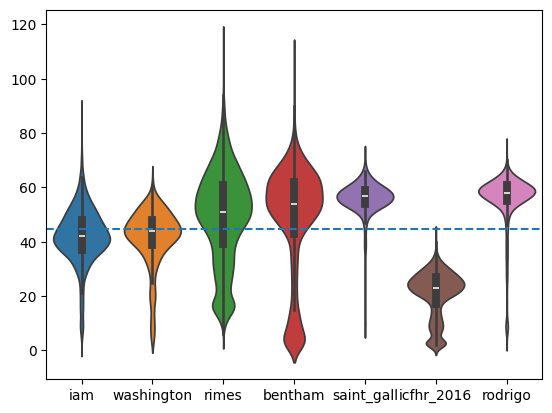

In [ ]:
ax = sb.violinplot([all_lens[dataset] for dataset in all_lens.keys()])#, order=[str(dataset) for dataset in all_lens.keys()])
ax.set_xticklabels([str(dataset) for dataset in all_lens.keys()])
mean_datasets = np.array([np.array(all_lens[dataset]).mean() for dataset in all_lens.keys()]).mean()
print(mean_datasets)
ax.axhline(mean_datasets, ls='--',)


In [ ]:
print(sorted(total_charset.items(), key=lambda x: x[1], reverse=True))
print(len(total_charset))
print(sorted(total_charset.items(), key=lambda x: x[0], reverse=True))

[(' ', 310017), ('e', 221773), ('t', 126976), ('n', 124779), ('a', 121901), ('i', 115142), ('o', 113301), ('s', 111564), ('r', 110775), ('d', 64031), ('h', 61209), ('l', 60089), ('u', 58135), ('c', 49568), ('m', 46176), ('p', 31765), ('f', 31716), ('g', 26609), ("'", 23266), ('v', 23264), ('b', 22219), ('.', 22007), ('w', 17610), (',', 17444), ('y', 17066), ('[', 12267), (']', 12260), ('\n', 11451), ('"', 9743), ('é', 9236), ('q', 6188), ('A', 5538), ('ū', 5357), ('k', 5157), ('M', 4559), ('j', 4368), ('I', 4253), ('-', 4088), ('S', 3988), ('C', 3808), ('E', 3617), ('T', 3581), ('P', 3547), ('x', 3420), ('z', 3326), ('J', 3175), ('0', 3088), ('1', 3013), (':', 2828), ('R', 2406), ('H', 2334), ('L', 2261), ('D', 2179), ('B', 2148), ('2', 2131), (';', 2128), ('W', 1948), ('à', 1813), ('¬', 1805), ('G', 1788), ('&', 1766), ('N', 1669), ('V', 1456), ('F', 1444), ('O', 1443), ('Z', 1425), ('5', 1334), ('è', 1231), ('3', 1138), ('6', 1025), ('4', 1024), ('7', 982), ('9', 817), ('α', 776), ('

In [ ]:
cleaned_charset = dict()
for k, v in total_charset.items():
   if k not in cleaned_charset and v > 3:
     cleaned_charset[k] = v

In [ ]:
print(sorted(cleaned_charset.items(), key=lambda x: x[1], reverse=True))
print(len(cleaned_charset))

In [ ]:
unicode_charset = dict()
for k, v in total_charset.items():
   if unidecode(k) not in unicode_charset:
     unicode_charset[unidecode(k)] = v
   else: 
     unicode_charset[unidecode(k)] += v

In [ ]:
print(unicode_charset)
print(len(unicode_charset))
print(sorted(unicode_charset.items(), key=lambda x: x[1], reverse=True))

{'W': 1948, 'i': 115245, 't': 126976, 'h': 61209, ' ': 310017, 's': 111564, 'o': 113816, 'm': 46176, 'e': 232560, 'n': 125057, 'g': 26609, 'f': 31716, 'a': 124950, 'r': 110775, 'I': 4253, 'b': 22219, 'd': 64031, 'w': 17610, "'": 23266, 'u': 63807, '.': 22007, '&': 1766, 'q': 6189, ';': 2128, 'M': 4559, 'y': 17375, 'k': 5157, 'A': 5539, 'p': 31765, 'l': 60089, ',': 17444, 'D': 2179, '?': 480, 'K': 677, 'T': 3581, 'c': 49993, 'Y': 451, 'S': 3988, 'B': 2148, 'P': 3605, 'H': 2334, 'L': 2261, '-': 4088, 'F': 1444, 'x': 3420, 'v': 23264, 'G': 1788, '(': 758, 'N': 1669, '1': 3013, '5': 1334, '3': 1138, '7': 982, '4': 1024, ')': 735, 'E': 3620, 'R': 2406, 'j': 4368, '!': 2078, 'C': 3809, 'V': 1456, ':': 2828, 'O': 1447, '9': 817, '8': 763, '#': 101, '2': 2133, '6': 1025, '0': 3088, '*': 24, 'z': 3326, 'U': 543, 'J': 3175, 'Q': 237, '"': 9743, 'X': 120, 'Z': 1425, '+': 55, '/': 282, '\n': 11451, '[': 12267, ']': 12260, 'EUR': 80, 'deg': 55, '$?': 103, '{': 15, '%': 8, '\\': 31, 'oe': 1, '}': 6,

In [ ]:
unicode_charset2 = dict()
for k, v in total_charset.items():
   if unidecode(k, replace_str='[UNK]') not in unicode_charset2:
     unicode_charset2[unidecode(k, replace_str='[UNK]')] = v
   else: 
     unicode_charset2[unidecode(k, replace_str='[UNK]')] += v

print(unicode_charset2)
print(len(unicode_charset2))
print(sorted(unicode_charset2.items(), key=lambda x: x[1], reverse=True))

{'W': 1948, 'i': 115245, 't': 126976, 'h': 61209, ' ': 310017, 's': 111564, 'o': 113816, 'm': 46176, 'e': 232560, 'n': 125057, 'g': 26609, 'f': 31716, 'a': 124950, 'r': 110775, 'I': 4253, 'b': 22219, 'd': 64031, 'w': 17610, "'": 23266, 'u': 63807, '.': 22007, '&': 1766, 'q': 6189, ';': 2128, 'M': 4559, 'y': 17375, 'k': 5157, 'A': 5539, 'p': 31765, 'l': 60089, ',': 17444, 'D': 2179, '?': 480, 'K': 677, 'T': 3581, 'c': 49993, 'Y': 451, 'S': 3988, 'B': 2148, 'P': 3605, 'H': 2334, 'L': 2261, '-': 4088, 'F': 1444, 'x': 3420, 'v': 23264, 'G': 1788, '(': 758, 'N': 1669, '1': 3013, '5': 1334, '3': 1138, '7': 982, '4': 1024, ')': 735, 'E': 3620, 'R': 2406, 'j': 4368, '!': 2078, 'C': 3809, 'V': 1456, ':': 2828, 'O': 1447, '9': 817, '8': 763, '#': 101, '2': 2133, '6': 1025, '0': 3088, '*': 24, 'z': 3326, 'U': 543, 'J': 3175, 'Q': 237, '"': 9743, 'X': 120, 'Z': 1425, '+': 55, '/': 282, '\n': 11451, '[': 12267, ']': 12260, 'EUR': 80, 'deg': 55, '$?': 103, '{': 15, '%': 8, '\\': 31, 'oe': 1, '}': 6,

In [ ]:
total_chars = sum([v for v in total_charset.values()])
print(total_chars)

freq_vocab = dict()

for c, v in total_charset.items():
  freq_vocab[c] = round((v / total_chars) * 100., 4)

print(sorted(freq_vocab.items(), key=lambda x: x[1], reverse=True))

2111097
[(' ', 14.6851), ('e', 10.5051), ('t', 6.0147), ('n', 5.9106), ('a', 5.7743), ('i', 5.4541), ('o', 5.3669), ('s', 5.2846), ('r', 5.2473), ('d', 3.0331), ('h', 2.8994), ('l', 2.8463), ('u', 2.7538), ('c', 2.348), ('m', 2.1873), ('p', 1.5047), ('f', 1.5023), ('g', 1.2604), ("'", 1.1021), ('v', 1.102), ('b', 1.0525), ('.', 1.0424), ('w', 0.8342), (',', 0.8263), ('y', 0.8084), ('[', 0.5811), (']', 0.5807), ('\n', 0.5424), ('"', 0.4615), ('é', 0.4375), ('q', 0.2931), ('A', 0.2623), ('ū', 0.2538), ('k', 0.2443), ('M', 0.216), ('j', 0.2069), ('I', 0.2015), ('-', 0.1936), ('S', 0.1889), ('C', 0.1804), ('E', 0.1713), ('T', 0.1696), ('P', 0.168), ('x', 0.162), ('z', 0.1575), ('J', 0.1504), ('0', 0.1463), ('1', 0.1427), (':', 0.134), ('R', 0.114), ('H', 0.1106), ('L', 0.1071), ('D', 0.1032), ('B', 0.1017), ('2', 0.1009), (';', 0.1008), ('W', 0.0923), ('à', 0.0859), ('¬', 0.0855), ('G', 0.0847), ('&', 0.0837), ('N', 0.0791), ('V', 0.069), ('F', 0.0684), ('O', 0.0684), ('Z', 0.0675), ('5', 

In [ ]:
total_chars = sum([v for v in unicode_charset.values()])
print(total_chars)

freq_vocab = dict()

for c, v in unicode_charset.items():
  freq_vocab[c] = round((v / total_chars) * 100., 4)

print(sorted(freq_vocab.items(), key=lambda x: x[1], reverse=True))
print(len(freq_vocab))
print(sorted(freq_vocab.items(), key=lambda x: x[0], reverse=True))

2111097
[(' ', 14.6851), ('e', 11.0161), ('t', 6.0147), ('n', 5.9238), ('a', 5.9187), ('i', 5.459), ('o', 5.3913), ('s', 5.2846), ('r', 5.2473), ('d', 3.0331), ('u', 3.0225), ('h', 2.8994), ('l', 2.8463), ('c', 2.3681), ('m', 2.1873), ('p', 1.5047), ('f', 1.5023), ('g', 1.2604), ("'", 1.1021), ('v', 1.102), ('b', 1.0525), ('.', 1.0424), ('w', 0.8342), (',', 0.8263), ('y', 0.823), ('[', 0.5811), (']', 0.5807), ('\n', 0.5424), ('"', 0.4615), ('q', 0.2932), ('A', 0.2624), ('k', 0.2443), ('M', 0.216), ('j', 0.2069), ('I', 0.2015), ('-', 0.1936), ('S', 0.1889), ('C', 0.1804), ('E', 0.1715), ('P', 0.1708), ('T', 0.1696), ('x', 0.162), ('z', 0.1575), ('J', 0.1504), ('0', 0.1463), ('1', 0.1427), (':', 0.134), ('R', 0.114), ('H', 0.1106), ('L', 0.1071), ('D', 0.1032), ('B', 0.1017), ('2', 0.101), (';', 0.1008), ('!', 0.0984), ('W', 0.0923), ('G', 0.0847), ('&', 0.0837), ('N', 0.0791), ('V', 0.069), ('O', 0.0685), ('F', 0.0684), ('Z', 0.0675), ('5', 0.0632), ('3', 0.0539), ('6', 0.0486), ('4', 0

In [ ]:
# print(list('á'.encode("utf-8")))
!pip install --upgrade unidecode 

print(unidecode('á ª à ä â ã å ą æ'))
print(unidecode('ú ü ù û ū'))
print(f'----')
print(unidecode('℣'))


rare_chars = sorted(total_charset.items(), key=lambda x: x[0], reverse=True)

for c, v in rare_chars:
  try:
    if unidecode(c, replace_str="UNK.", errors="strict") == '':
      print(f'Non convertible {c}. [UNK]')
    else:
      print(f'{c} {unidecode(c, replace_str="UNK.", errors="strict")}')
  except Exception as e:
    print(f'{e}')

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
a a a a a a a a ae
u u u u u
----

Non convertible ♦. [UNK]
no replacement found for character '⊥' in position 0
Non convertible ℣. [UNK]
€ EUR
— --
α a
Non convertible ̈. [UNK]
Non convertible ̄. [UNK]
ʠ q
ȳ y
ū u
œ oe
ō o
ī i
ē e
ā a
ÿ y
ü u
û u
ù u
ö o
ô o
ó o
ñ n
î i
í i
ë e
ê e
é e
è e
ç c
ä a
â a
á a
à a
ß ss
Ö O
É E
Ç C
À A
¶ P
² 2
° deg
¬ !
§ SS
¤ $?
£ PS
} }
| |
{ {
z z
y y
x x
w w
v v
u u
t t
s s
r r
q q
p p
o o
n n
m m
l l
k k
j j
i i
h h
g g
f f
e e
d d
c c
b b
a a
_ _
] ]
\ \
[ [
Z Z
Y Y
X X
W W
V V
U U
T T
S S
R R
Q Q
P P
O O
N N
M M
L L
K K
J J
I I
H H
G G
F F
E E
D D
C C
B B
A A
? ?
> >
= =
< <
; ;
: :
9 9
8 8
7 7
6 6
5 5
4 4
3 3
2 2
1 1
0 0
/ /
. .
- -
, ,
+ +
* *
) )
( (
' '
& &
% %
# #
" "
! !
   

 



In [ ]:
for i in range(1024):
  print(f'{chr(i)} {ord(chr(i))} {unidecode(chr(i))}')

In [ ]:
special_unicode = dict({
   '€':'€',
   '°':'°',
   '¤':'[UNK]',
   'œ':'[UNK]',
   '§':'§',
   '£':'£',
   'ß':'ß',
   '\n': '',
})

for k, v in total_charset.items():
  if k not in special_unicode.keys():
    print(f'{k} {unidecode(k)} {k==unidecode(k)}')
  else: 
    print(f'{special_unicode[k]} {special_unicode[k]} {True}')

W W True
i i True
t t True
h h True
    True
s s True
o o True
m m True
e e True
n n True
g g True
f f True
a a True
r r True
I I True
b b True
d d True
w w True
' ' True
u u True
. . True
& & True
q q True
; ; True
M M True
y y True
k k True
A A True
p p True
l l True
, , True
D D True
? ? True
K K True
T T True
c c True
Y Y True
S S True
B B True
P P True
H H True
L L True
- - True
F F True
x x True
v v True
G G True
( ( True
N N True
1 1 True
5 5 True
3 3 True
7 7 True
4 4 True
) ) True
E E True
R R True
j j True
! ! True
C C True
V V True
: : True
O O True
9 9 True
8 8 True
# # True
2 2 True
6 6 True
0 0 True
* * True
z z True
U U True
J J True
Q Q True
" " True
X X True
Z Z True
+ + True
/ / True
  True
[ [ True
] ] True
é e False
ê e False
à a False
€ € True
û u False
è e False
ô o False
° ° True
ç c False
î i False
ù u False
[UNK] [UNK] True
{ { True
% % True
ë e False
â a False
\ \ True
É E False
[UNK] [UNK] True
} } True
= = True
_ _ True
² 2 False
À A False
< < True
> > True


In [ ]:
import torch 

idxs = torch.tensor([
  [81, 81, 101, 101, 101, 101, 101, 101],
  [50, 50, 101, 101, 101, 101, 101, 101],
  [50, 50, 101, 101, 49, 101, 101, 101]
])

print(torch.unique_consecutive(idxs, dim=-1))

tensor([[ 81, 101, 101, 101],
        [ 50, 101, 101, 101],
        [ 50, 101,  49, 101]])


In [ ]:
### Read iamges ICFHR_2016
import os
# path_data_icfhr_2016 = f'../data/htr_datasets/icfhr_2016/PublicData/Training/page/'

list_txt_icfhr_2016 = !find ../data/htr_datasets/icfhr_2016/ -type f -name "*.xml"
list_txt_icfhr_2016 = list_txt_icfhr_2016[3:]

print(sorted(list_txt_icfhr_2016))

images_icfhr, gt_icfhr = [], []

for file in list_txt_icfhr_2016:
  if "Test" not in file:
    image_path = file[:-4] + '.JPG'
  else:
    image_path = str(file[:-4]).replace("/page", "") + '.JPG'
  
  images_icfhr.append(image_path)
  gt_icfhr.append(file)


# for file in os.listdir(path_data_icfhr_2016):
#   if '.JPG' in file: 
#     images_icfhr.append(file)
#   elif '.xml' in file:
#     gt_icfhr.append(file)

print(len(images_icfhr), len(gt_icfhr))

images_icfhr = sorted(images_icfhr)
gt_icfhr = sorted(gt_icfhr)

print(gt_icfhr)

['../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0001.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0002.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0003.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0004.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0005.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0007.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0008.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0009.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0010.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0011.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0012.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0013.xml', '../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0014.xml', '../data/htr_datasets/icfhr_2016/Publ

In [ ]:
# for image, file in zip(sorted(images_icfhr), sorted(gt_icfhr)):
#   print(image, file)

# !pip install --upgrade xml

import torchvision
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import re
import numpy as np

idx = 3
print(images_icfhr[idx])

# image = torchvision.io.read_image(f'{path_data_icfhr_2016}{images_icfhr[idx]}')
# plt.imshow(image.permute(1, 2, 0))

# list_xml_icfhr = gt_icfhr[3:4]

path_images_to_save = f'../icfhr_2016_lines/lines/'
path_transcriptions_to_save = f'../icfhr_2016_lines/transcriptions/'


def parse_xml_auto_namespace(xml_file):
    # Parse the XML file to extract the namespace map name
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for items_root in root.items():
      ns_val = items_root[1].split(" ")[0]

    ns = {namespace_map_name: ns_val}

    return ns_val


def get_bbox(coords):
  xs, ys = [], []
  for coord in coords.split(" "):
    x, y = coord.split(",")
    xs.append(int(x))
    ys.append(int(y))

  xmin = np.array(xs).min()
  xmax = np.array(xs).max()
  ymin = np.array(ys).min()
  ymax = np.array(ys).max()

  return xmin, ymin, xmax, ymax


def parse_textline_regions(xml_file, namespace_map_name):
    print(xml_file)
    # Construct the namespace map using the provided name
    namespace_map_name = parse_xml_auto_namespace(xml_file) 
    ns = {'ns': namespace_map_name}

    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Find all TextLine elements
    text_lines = root.findall('.//ns:TextLine', ns)
    data = []

    # Iterate over each TextLine
    for text_line in text_lines:
        coords = text_line.find('./ns:Coords', ns).attrib['points']
        baseline = text_line.find('./ns:Baseline', ns).attrib['points']
        text_equiv = text_line.find('./ns:TextEquiv', ns)
        unicode_label = text_equiv.find('./ns:Unicode', ns).text if text_equiv is not None else None

        # Append the data to the list
        data.append({
            'Coords': coords,
            'Baseline': baseline,
            'Unicode': unicode_label
        })

    return data


# Usage
xml_file = file
namespace_map_name = None #'http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15'

print(f'Parsing ICFHR-2016')
for id_image, (xml_file, path_image) in enumerate(zip(gt_icfhr, images_icfhr)):
  # path_xml_file = f'{path_data_icfhr_2016}{xml_file}'
  path_xml_file = xml_file
  xml_file = ''.join(xml_file.split("/")[-1])
  print(f'Id image: {id_image}')
  print(f'xml file: {xml_file}')
  print(f'Path image: {path_image}')
  # image = torchvision.io.read_image(f'{path_data_icfhr_2016}{path_image}')
  image = torchvision.io.read_image(f'{path_image}')
  try:
    parsed_data = parse_textline_regions(path_xml_file, namespace_map_name)
  except Exception as e:
    print(f'Exception {e}')
    continue
  # fig, ax = plt.subplots((len(parsed_data)), figsize=(100, 100))

  for idx, item in enumerate(parsed_data):
      text = item['Unicode']
      bboxes = get_bbox(item['Coords'])
      text = text.replace("¬", "") if text is not None else ""
      
      image_pil = torchvision.transforms.functional.to_pil_image(image)
      cropped = image_pil.crop(bboxes)
      path_line_image = f'{path_images_to_save}{xml_file[:-4]}_{idx}.png'
      path_line_transcription = f'{path_transcriptions_to_save}{xml_file[:-4]}_{idx}.txt'
      print(f'Path line image: {path_line_image}')
      print(f'Path line transcription: {path_line_transcription}')

      cropped.save(path_line_image, 'PNG')

      with open(f'{path_line_transcription}', 'w') as f_transcription:
        f_transcription.write(text)
 

../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0004.JPG
Parsing ICFHR-2016
Id image: 0
xml file: Seite0001.xml
Path image: ../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0001.JPG
../data/htr_datasets/icfhr_2016/PublicData/Training/page/Seite0001.xml
Path line image: ../icfhr_2016_lines/lines/Seite0001_0.png
Path line transcription: ../icfhr_2016_lines/transcriptions/Seite0001_0.txt
Path line image: ../icfhr_2016_lines/lines/Seite0001_1.png
Path line transcription: ../icfhr_2016_lines/transcriptions/Seite0001_1.txt
Path line image: ../icfhr_2016_lines/lines/Seite0001_2.png
Path line transcription: ../icfhr_2016_lines/transcriptions/Seite0001_2.txt
Path line image: ../icfhr_2016_lines/lines/Seite0001_3.png
Path line transcription: ../icfhr_2016_lines/transcriptions/Seite0001_3.txt
Path line image: ../icfhr_2016_lines/lines/Seite0001_4.png
Path line transcription: ../icfhr_2016_lines/transcriptions/Seite0001_4.txt
Path line image: ../icfhr_2016_lines/lines/Se

(85, 71)
(71, 85, 4)
[35 35 35]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
torch.Size([4, 71, 85])


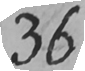

In [ ]:
import torch
import torchvision
from PIL import Image
import numpy as np

image = Image.open("../data/htr_datasets/bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_01_01.png")

print(image.size)

empty_tensor = torch.ones((3, image.size[1], image.size[0]))

image_np = np.asarray(image)
print(image_np.shape)
max_pixel_value_rgb = image_np[:, :, :-1].reshape((image_np.shape[0]*image_np.shape[1], 3)).min(axis=0)
print(max_pixel_value_rgb)

empty_tensor[0, :, :] = max_pixel_value_rgb[0] 
empty_tensor[1, :, :] = max_pixel_value_rgb[1]
empty_tensor[2, :, :] = max_pixel_value_rgb[2]


print(image_np[:, :, -1])

image_torch = torch.tensor(image_np)
image_torch = image_torch.permute(2, 0, 1) / 255.

print(image_torch.shape)

image_masked = empty_tensor + image_torch[-1] * image_torch[:-1] 
image_masked = torchvision.transforms.ToPILImage()(image_masked)

image_background = torchvision.transforms.ToPILImage()(empty_tensor)

image




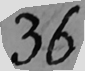

In [ ]:
image_masked

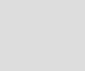

In [ ]:
image_background

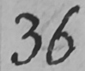

In [ ]:
image_bin_pil = Image.open("../data/htr_datasets/bentham/BenthamDatasetR0-GT/Images/Lines/002_080_001_01_01.png").convert('L')
# background = Image.new('RGBA', png.size, (255, 255, 255))

# alpha_composite = Image.alpha_composite(background, png)
# alpha_composite
# alpha_composite.save('foo.jpg', 'JPEG', quality=80)
image_bin_pil

In [ ]:
from sklearn.cluster import KMeans

def binarize_image(image, channels=3):
      image = image.numpy()
      image = image/image.reshape(-1).max()

      # Change Nan values to 0
      image[np.isnan(image)] = 0.0

      try:
        kmeans_image = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(image.reshape(channels, -1).transpose(1, 0))
        image_bin = kmeans_image.predict(image.reshape(channels, -1).transpose(1, 0))
        vector_diff = kmeans_image.cluster_centers_[0] - kmeans_image.cluster_centers_[1]
        image_bin = image_bin.reshape(image.shape[-2], image.shape[-1])

        if np.sum(vector_diff) > 0.0: # Cluster 0 assignations should be 1 and Cluster 1 assignations should be 0
          image_bin = 1 - image_bin

        image_bin = image_bin.reshape(1, image.shape[-2], image.shape[-1])
      except Exception as e:
        print(f'Exception {e} while binarizing image. Returning image as is...')
        image_bin = image

      return image_bin

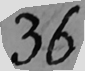

In [ ]:
image_masked

In [ ]:
print(image_masked_bin.size, type(image_masked_bin))
print(torchvision.transforms.ToTensor()(image_masked).shape)
image_masked_bin = torch.tensor(binarize_image(torchvision.transforms.ToTensor()(image_masked), channels=3))
print(image_masked_bin.shape, type(image_masked_bin))
print(image_masked_bin)
image_masked_bin = torchvision.transforms.ToPILImage(mode="1")(image_masked_bin)
image_masked_bin


(85, 71) <class 'PIL.Image.Image'>
torch.Size([3, 71, 85])
torch.Size([1, 71, 85]) <class 'torch.Tensor'>
tensor([[[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]]], dtype=torch.int32)


ValueError: Incorrect mode (1) supplied for input type <class 'numpy.dtype'>. Should be I

In [ ]:
# alpha_composite = torchvision.transforms.ToTensor()(alpha_composite)
# print(alpha_composite_bin.shape)
# alpha_composite_bin = binarize_image(alpha_composite, 3)
# print(alpha_composite_bin.shape)

(4, 71, 85)
Exception cannot reshape array of size 24140 into shape (3,newaxis) while binarizing image. Returning image as is...
(4, 71, 85)


In [ ]:
import os
path_images_bentham = f'../data/htr_datasets/bentham/BenthamDatasetR0-GT/Images/Lines/'
path_to_bin_images = f'../images_bin_bentham/'

for image_path in sorted(os.listdir(path_images_bentham)):
  complete_image_path = path_images_bentham + image_path

  image = Image.open(complete_image_path)

  if image.mode == 'RGBA':
    image = image.convert("L")
    channels = 1
  elif image.mode == 'RGB':
    channels = 3

  print(f'Channels: {channels}')

  image = torchvision.transforms.ToTensor()(image)
  image = binarize_image(image, channels=channels)
  image = torch.tensor(image, dtype=torch.float32)
  print(f'Image shape after bin: {image.shape}. Type: {type(image)}')
  image = torchvision.utils.save_image(image, f'{path_to_bin_images}/{image_path}')







Channels: 1
Image shape after bin: torch.Size([1, 71, 85]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 110, 521]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 157, 1639]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 137, 1592]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 163, 1628]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 138, 1566]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 150, 1572]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 128, 1685]). Type: <class 'torch.Tensor'>
Channels: 1


Image shape after bin: torch.Size([1, 131, 1720]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 139, 1675]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 152, 1641]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 128, 1585]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 147, 1671]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 159, 1649]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 151, 1191]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 141, 1653]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 132, 1624]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 148, 1718]). Type: <class 'torch.Tensor'>
Channels: 1
Image shape after bin: torch.Size([1, 152, 1654]). Type: <class 'torch.Tensor'>


In [ ]:
!rm -r ../images_bin_bentham/*

In [ ]:
# from datasets import load_dataset
# from torch.utils.data import DataLoader
# from tqdm import tqdm

# mls = load_dataset("facebook/multilingual_librispeech", "french", split="train", streaming=True)
# dataloader = DataLoader(mls, batch_size=128)
# total_examples = 0

# for data in tqdm(mls):
#   # print(data['text'])
#   total_examples += len(data)

# print(total_examples)

368it [00:36, 10.12it/s]


KeyboardInterrupt: 

In [81]:
!pip install --upgrade huggingface
!pip install --upgrade tokenizers
!pip install --upgrade transformers
from tokenizers import Tokenizer, normalizers
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from transformers import AutoTokenizer
!pip install datasets
import datasets
from datasets import load_dataset
from tqdm import tqdm
from transformers import PreTrainedTokenizerFast
import numpy as np
!pip install unidecode
from unidecode import unidecode

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)

from transformers import PreTrainedTokenizer, PreTrainedTokenizerFast, AutoTokenizer

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
path_wit_en = "../data/synth/wit_dataset/wit-dataset-en-train.txt"

with open(f'{path_wit_en}', 'r') as f:
  wit_en_raw = f.readlines()

print(wit_en_raw[:10])
print(len(wit_en_raw))

['The grey francolin is a species of francolin found in the plains and drier parts of the Indian subcontinent. This species was formerly also called the grey partridge, not to be confused with the European grey partridge. They are found in open cultivated lands as well as scrub forest and their local name of teetar is based on their calls, a loud and repeated Ka-tee-tar...tee-tar which is produced by one or more birds. The term teetar can also refer to other partridges and quails. During the breeding season calling males attract challengers, and decoys were used to trap these birds especially for fighting.\n', 'Ballymalis Castle is a tower house and National Monument located in County Kerry, Ireland.\n', 'Weightlifting at the 2018 Summer Youth Olympics was held from 7 to 13 October. The events took place at Parque Polideportivo Roca in Buenos Aires, Argentina.\n', 'Thomas Weber is an Austrian footballer who plays for Admira Wacker.\n', 'Josh Soares is a Canadian professional ice hockey

In [7]:
# Write in a file the unidecoded version of wit_en

charset_wit_en_unidecoded = set()
# different_words = set()
with open(f'../data/synth/wit_dataset/wit-dataset-en-train-unidecoded.txt', 'w') as f:
  for line in tqdm(wit_en_raw):
    unidecoded_line = unidecode(line)
    splitted_words = unidecoded_line.split(" ")
    # different_words.update(splitted_words)
    chartset_line = set(unidecoded_line)
    charset_wit_en_unidecoded.update(chartset_line)
    f.write(unidecoded_line)

100%|██████████| 2292085/2292085 [01:30<00:00, 25306.76it/s]


In [10]:
# from tokenizers import ByteLevelBPETokenizer, Tokenizer, modelss

# tokenizer = ByteLevelBPETokenizer()
tokenizer = Tokenizer(models.BPE())
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
trainer = trainers.BpeTrainer(vocab_size=16000, special_tokens=[
    "[BOS]",
    "[EOS]",
    "[PAD]",
    "[UNK]",
])

# tokenizer.train(files=["/content/wit_dataset/wit-dataset-en-train-unidecoded.txt"], vocab_size=16_000, min_frequency=2, special_tokens=[
#     "<s>",
#     "<pad>",
#     "</s>",
#     "<unk>",
#     "<mask>",
# ])  

tokenizer.train(["/content/wit_dataset/wit-dataset-en-train-unidecoded.txt"], trainer=trainer)

In [6]:
tokenizer = Tokenizer(models.BPE())
# trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[PAD]", "[MASK]"], vocab_size=32000, min_frequency=2)
n_tokens = 300
trainer = BpeTrainer(vocab_size=n_tokens, min_frequency=2, show_progress=True, special_tokens=[
    "[BOS]",
    "[EOS]",
    "[PAD]",
    "[UNK]"
])


# tokenizer.pre_tokenizer = Whitespace()
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
# tokenizer.normalizer = normalizers.BertNormalizer(lowercase=False)
files = ["../data/synth/wit_dataset/wit-dataset-en-train-unidecoded.txt"]

# tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.train(files=files, trainer=trainer)
# tokenizer.train_new_from_iterator(files, 32000)

# tokenizer.save_pretrained("data/tokenizer-wit.json")
cktp_path = f'../checkpoints_tokenizers/wit_en_tokenizer_unidecoded_{n_tokens}.json'
tokenizer.save(cktp_path)

In [77]:
cktp_path = f'../checkpoints_tokenizers/wit_en_tokenizer_unidecoded_{n_tokens}.json'
tokenizer_loaded = Tokenizer.from_file(cktp_path)
tokenizer_loaded.post_processor = processors.ByteLevel(trim_offsets=False)
tokenizer_loaded.decoder = decoders.ByteLevel()

# text = "Hola me llamo carlos y me encanta el helado"
# print(tokenizer_loaded.encode(text).ids)
# print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

# text = "Hello I am carlos and I love ice cream"
text = "would almost certainly involve a corresponding"
print(tokenizer_loaded.encode(text).ids)
print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

[90, 1263, 3267, 4428, 176, 13036, 101, 11602]
would almost certainly involve a corresponding


### Checking different vocab_sizes for i.e. IAM

In [6]:
ckpt_path = f'../checkpoints_tokenizers/wit_en_tokenizer_unidecoded_300.json'
tokenizer_loaded = Tokenizer.from_file(ckpt_path)
tokenizer_loaded.post_processor = processors.ByteLevel(trim_offsets=False)
tokenizer_loaded.decoder = decoders.ByteLevel()

text = "Hola me llamo carlos y me encanta el helado"
print(tokenizer_loaded.encode(text).ids)
print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

text = "Hello I am carlos and I love ice cream"
print(tokenizer_loaded.encode(text).ids)
print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

[43, 154, 68, 136, 72, 148, 79, 152, 82, 124, 122, 79, 226, 99, 92, 136, 72, 99, 114, 70, 274, 68, 99, 156, 289, 79, 171, 82]
Hola me llamo carlos y me encanta el helado
[43, 156, 79, 82, 146, 101, 80, 124, 122, 79, 226, 128, 146, 148, 82, 89, 72, 99, 126, 72, 124, 110, 152]
Hello I am carlos and I love ice cream


In [78]:
print(f'TOKENS {101}. CKPT PATH: no_path')
text = "would almost certainly involve a corresponding"
text_to_nums = [ord(c) for c in text]
print(text_to_nums)
print(f'Lenght of text: {len(text_to_nums)}')

for toks in [300, 500, 1000, 4000, 16000]:
  ckpt_path = f'../checkpoints_tokenizers/wit_en_tokenizer_unidecoded_{toks}.json' 
  print(f'TOKENS: {toks}. CKPT PATH: {ckpt_path}')
  tokenizer_loaded = Tokenizer.from_file(ckpt_path)
  tokenizer_loaded.post_processor = processors.ByteLevel(trim_offsets=False)
  tokenizer_loaded.decoder = decoders.ByteLevel()

  # text = "Hola me llamo carlos y me encanta el helado"
  # print(tokenizer_loaded.encode(text).ids)
  # print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

  # text = "Hello I am carlos and I love ice cream"
  
  print(tokenizer_loaded.encode(text).ids)
  print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
  # print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

TOKENS 101. CKPT PATH: no_path
[119, 111, 117, 108, 100, 32, 97, 108, 109, 111, 115, 116, 32, 99, 101, 114, 116, 97, 105, 110, 108, 121, 32, 105, 110, 118, 111, 108, 118, 101, 32, 97, 32, 99, 111, 114, 114, 101, 115, 112, 111, 110, 100, 105, 110, 103]
Lenght of text: 46
TOKENS: 300. CKPT PATH: ../checkpoints_tokenizers/wit_en_tokenizer_unidecoded_300.json
[90, 132, 79, 71, 237, 80, 82, 151, 124, 104, 87, 229, 176, 117, 89, 154, 89, 72, 101, 124, 113, 244, 83, 109, 71, 134]
Length of tokens: 26


### Train WordPiece tokenizers (same setup as BPE)

In [1]:
import os
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]"]
files = ["../data/synth/wit_dataset/wit-dataset-en-train-unidecoded.txt"]

for n_tokens in [300, 500, 1000, 4000, 16000]:

  # WordPiece Tokenizer
  cktp_path = f'../checkpoints_tokenizers/wit_en_wordpiece_tokenizer_unidecoded_{n_tokens}.json'
  if os.path.exists(cktp_path) is False:
    tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))
    trainer = trainers.WordPieceTrainer(vocab_size=n_tokens, special_tokens=special_tokens)
    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
    tokenizer.train(files=files, trainer=trainer)
    tokenizer.save(cktp_path)

  # BPE Tokenizer
  cktp_path = f'../checkpoints_tokenizers/wit_en_bpe_tokenizer_unidecoded_{n_tokens}.json'
  if os.path.exists(cktp_path) is False:
    tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
    trainer = trainers.BpeTrainer(vocab_size=n_tokens, special_tokens=special_tokens)
    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
    tokenizer.train(files=files, trainer=trainer)  
    tokenizer.save(cktp_path)

  # Unigram Tokenizer
  cktp_path = f'../checkpoints_tokenizers/wit_en_unigram_tokenizer_unidecoded_{n_tokens}.json'
  if os.path.exists(cktp_path) is False:
    tokenizer = Tokenizer(models.Unigram())
    trainer = trainers.UnigramTrainer(vocab_size=n_tokens, special_tokens=special_tokens, unk_token="[UNK]")
    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
    tokenizer.train(files=files, trainer=trainer)  
    tokenizer.save(cktp_path)


NameError: name 'Tokenizer' is not defined

In [111]:
import os

print(f'TOKENS {101}. CKPT PATH: no_path')
text = "I wouldn't be that sure of the aforementioned words, instead I think it would almost certainly involve a corresponding"
# text = "The celebration will take in the second place"
print(text)
text_to_nums = [ord(c) for c in text]
print(text_to_nums)
print(f'Lenght of text: {len(text_to_nums)}')

for n_tokens in [300, 500, 1000, 4000, 16000]:

  # WordPiece Tokenizer
  ckpt_path = f'../checkpoints_tokenizers/wit_en_wordpiece_tokenizer_unidecoded_{n_tokens}.json'
  if os.path.exists(ckpt_path) is True:
    print(f'CKPT PATH: {ckpt_path}. TOKENS: {n_tokens}')
    tokenizer_loaded = Tokenizer.from_file(ckpt_path)
    # tokenizer_loaded.decoder = decoders.WordPiece(prefix="##")
    # tokenizer_loaded.decoder = decoders.ByteLevel()
    tokenizer_loaded.decoder = [decoders.WordPiece(prefix="##"), decoders.ByteLevel()]
    print(tokenizer_loaded.encode(text).ids)
    print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
    print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))
    
  print()

  # BPE Tokenizer
  ckpt_path = f'../checkpoints_tokenizers/wit_en_bpe_tokenizer_unidecoded_{n_tokens}.json'
  if os.path.exists(ckpt_path) is True:
    print(f'CKPT PATH: {ckpt_path}. TOKENS: {n_tokens}')
    tokenizer_loaded = Tokenizer.from_file(ckpt_path)
    tokenizer_loaded.post_processor = processors.ByteLevel(trim_offsets=False)
    tokenizer_loaded.decoder = decoders.ByteLevel()
    print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
    print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

  print()  

  # Unigram Tokenizer
  ckpt_path = f'../checkpoints_tokenizers/wit_en_unigram_tokenizer_unidecoded_{n_tokens}.json'
  if os.path.exists(cktp_path) is True:
    print(f'CKPT PATH: {cktp_path}. TOKENS: {n_tokens}')
    tokenizer_loaded = Tokenizer.from_file(ckpt_path)
    # tokenizer_loaded.post_processor = processors.ByteLevel(trim_offsets=False)
    tokenizer_loaded.decoder = decoders.ByteLevel()
    # tokenizer_loaded.decoder = decoders.Unigram()
    print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
    print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))
  
  print()



TOKENS 101. CKPT PATH: no_path
I wouldn't be that sure of the aforementioned words, instead I think it would almost certainly involve a corresponding
[73, 32, 119, 111, 117, 108, 100, 110, 39, 116, 32, 98, 101, 32, 116, 104, 97, 116, 32, 115, 117, 114, 101, 32, 111, 102, 32, 116, 104, 101, 32, 97, 102, 111, 114, 101, 109, 101, 110, 116, 105, 111, 110, 101, 100, 32, 119, 111, 114, 100, 115, 44, 32, 105, 110, 115, 116, 101, 97, 100, 32, 73, 32, 116, 104, 105, 110, 107, 32, 105, 116, 32, 119, 111, 117, 108, 100, 32, 97, 108, 109, 111, 115, 116, 32, 99, 101, 114, 116, 97, 105, 110, 108, 121, 32, 105, 110, 118, 111, 108, 118, 101, 32, 97, 32, 99, 111, 114, 114, 101, 115, 112, 111, 110, 100, 105, 110, 103]
Lenght of text: 118
CKPT PATH: ../checkpoints_tokenizers/wit_en_wordpiece_tokenizer_unidecoded_300.json. TOKENS: 300
[44, 219, 228, 112, 125, 108, 10, 118, 226, 102, 298, 208, 214, 253, 102, 207, 200, 197, 135, 209, 102, 123, 240, 229, 212, 219, 209, 125, 114, 15, 213, 247, 102, 266, 242, 

In [8]:
# print(f'TOKENS {101}. CKPT PATH: no_path')
# text = "would almost certainly involve a corresponding"
# text_to_nums = [ord(c) for c in text]
# print(text_to_nums)
# print(f'Lenght of text: {len(text_to_nums)}')

# for toks in [300, 500, 1000, 4000, 16000]:
#   ckpt_path = f'../checkpoints_tokenizers/wit_en_bpe_tokenizer_unidecoded_{toks}.json'
#   print(f'TOKENS: {toks}. CKPT PATH: {ckpt_path}')
#   tokenizer_loaded = Tokenizer.from_file(ckpt_path)
#   tokenizer_loaded.post_processor = processors.ByteLevel(trim_offsets=False)
#   # tokenizer_loaded.decoder = decoders.ByteLevel(add_prefix_space=True)
  
  
#   print(tokenizer_loaded.encode(text).ids)
#   print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
#   print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))

In [2]:
import os

print(f'TOKENS {101}. CKPT PATH: no_path')
text = "I wouldn't be that sure of the aforementioned words but I'll stick to it because we've to, --but-- instead I think it would almost certainly involve a corresponding"
# text = "The celebration will take in the second place"
print(text)
text_to_nums = [ord(c) for c in text]
print(text_to_nums)
print(f'Lenght of text: {len(text_to_nums)}')

TOKENS 101. CKPT PATH: no_path
I wouldn't be that sure of the aforementioned words but I'll stick to it because we've to, --but-- instead I think it would almost certainly involve a corresponding
[73, 32, 119, 111, 117, 108, 100, 110, 39, 116, 32, 98, 101, 32, 116, 104, 97, 116, 32, 115, 117, 114, 101, 32, 111, 102, 32, 116, 104, 101, 32, 97, 102, 111, 114, 101, 109, 101, 110, 116, 105, 111, 110, 101, 100, 32, 119, 111, 114, 100, 115, 32, 98, 117, 116, 32, 73, 39, 108, 108, 32, 115, 116, 105, 99, 107, 32, 116, 111, 32, 105, 116, 32, 98, 101, 99, 97, 117, 115, 101, 32, 119, 101, 39, 118, 101, 32, 116, 111, 44, 32, 45, 45, 98, 117, 116, 45, 45, 32, 105, 110, 115, 116, 101, 97, 100, 32, 73, 32, 116, 104, 105, 110, 107, 32, 105, 116, 32, 119, 111, 117, 108, 100, 32, 97, 108, 109, 111, 115, 116, 32, 99, 101, 114, 116, 97, 105, 110, 108, 121, 32, 105, 110, 118, 111, 108, 118, 101, 32, 97, 32, 99, 111, 114, 114, 101, 115, 112, 111, 110, 100, 105, 110, 103]
Lenght of text: 164


### Check BPE

In [5]:
### Check BPE
n_tokens = 300
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]"]
files = ["../data/synth/wit_dataset/wit-dataset-en-train-unidecoded.txt"]
# BPE Tokenizer
ckpt_path = f'../checkpoints_tokenizers/check_wit_en_bpe_tokenizer_unidecoded_{n_tokens}.json'
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
trainer = trainers.BpeTrainer(vocab_size=n_tokens, special_tokens=special_tokens)
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
tokenizer.train(files=files, trainer=trainer)  
tokenizer.save(ckpt_path)



In [6]:
print(f'CKPT PATH: {ckpt_path}. TOKENS: {n_tokens}')
tokenizer_loaded = Tokenizer.from_file(ckpt_path)
tokenizer_loaded.decoder = decoders.ByteLevel()
print(tokenizer_loaded.encode(text).ids)
print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))


CKPT PATH: ../checkpoints_tokenizers/check_wit_en_bpe_tokenizer_unidecoded_300.json. TOKENS: 300
[44, 123, 132, 79, 71, 81, 10, 87, 245, 202, 112, 118, 88, 110, 111, 105, 101, 73, 296, 80, 144, 133, 116, 123, 113, 71, 86, 130, 216, 146, 10, 79, 79, 197, 126, 78, 145, 238, 130, 214, 68, 168, 72, 123, 72, 10, 89, 72, 145, 15, 99, 16, 16, 69, 216, 16, 16, 117, 151, 72, 171, 146, 202, 103, 78, 238, 123, 132, 79, 71, 237, 80, 82, 151, 124, 104, 87, 229, 176, 117, 89, 154, 89, 72, 101, 124, 113, 244, 83, 109, 71, 134]
Length of tokens: 92
I wouldn't be that sure of the aforementioned words but I'll stick to it because we've to, --but-- instead I think it would almost certainly involve a corresponding


In [13]:
### Check WordPiece
# WordPiece Tokenizer
n_tokens = 300
files = ["../data/synth/wit_dataset/wit-dataset-en-train-unidecoded.txt"]
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]"]
# special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
cktp_path = f'../checkpoints_tokenizers/check2_wit_en_wordpiece_tokenizer_unidecoded_{n_tokens}.json'
tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
# tokenizer.pre_tokenizer = pre_tokenizers.WhitespaceSplit()
trainer = trainers.WordPieceTrainer(vocab_size=n_tokens, special_tokens=special_tokens)
tokenizer.train(files=files, trainer=trainer)

tokenizer.save(cktp_path)

In [11]:
encoding = tokenizer.encode("Let's test this tokenizer.")
print(encoding.tokens)

tokenizer.decoder = decoders.WordPiece(prefix="##")
print(tokenizer.decode(tokenizer.encode(text).ids))

['L', '##et', "##'", '##s', 't', '##est', 'th', '##is', 'to', '##k', '##en', '##i', '##z', '##er', '##.']
I wouldn't be that sure of the aforementioned words but I'll stick to it because we've to, --but-- instead I think it would almost certainly involve a corresponding


In [12]:
import re 
print(f'CKPT PATH: {cktp_path}. TOKENS: {n_tokens}')
tokenizer_loaded = Tokenizer.from_file(cktp_path)
tokenizer_loaded.decoder = decoders.WordPiece(prefix="##")
print(tokenizer_loaded.encode(text).ids)
print(f'Length of tokens: {len(tokenizer_loaded.encode(text).ids)}')
print(tokenizer_loaded.decode(tokenizer_loaded.encode(text).ids))


CKPT PATH: ../checkpoints_tokenizers/check_wit_en_wordpiece_tokenizer_unidecoded_300.json. TOKENS: 300
[44, 90, 214, 106, 113, 112, 150, 118, 297, 257, 201, 86, 224, 102, 198, 194, 68, 128, 199, 251, 220, 215, 203, 90, 199, 113, 115, 69, 278, 44, 150, 106, 106, 252, 211, 127, 221, 76, 118, 297, 114, 107, 247, 102, 90, 102, 150, 129, 102, 221, 120, 16, 123, 131, 278, 123, 123, 207, 225, 102, 238, 44, 257, 196, 127, 76, 118, 90, 214, 106, 113, 292, 124, 279, 118, 70, 193, 118, 288, 241, 207, 129, 223, 129, 102, 68, 70, 199, 216, 115, 116, 197, 113, 217]
Length of tokens: 94
I wouldn't be that sure of the aforementioned words but I'll stick to it because we've to, --but-- instead I think it would almost certainly involve a corresponding


['I', 'w', '##ou', '##l', '##d', '##n', "'", 't', 'be', 'th', '##at', 's', '##ur', '##e', 'of', 'the', 'a', '##f', '##or', '##em', '##ent', '##ion', '##ed', 'w', '##or', '##d', '##s', 'b', '##ut', 'I', "'", 'l', '##l', 'st', '##ic', '##k', 'to', 'i', '##t', ',', 'in', '##st', '##e', '##ad', 'I', 'th', '##in', '##k', 'i', '##t', 'w', '##ou', '##l', '##d', 'al', '##m', '##os', '##t', 'c', '##er', '##t', '##ain', '##ly', 'in', '##v', '##ol', '##v', '##e', 'a', 'c', '##or', '##re', '##s', '##p', '##on', '##d', '##ing']


CKPT PATH: ../checkpoints_tokenizers/check_wit_en_wordpiece_tokenizer_unidecoded_300.json. TOKENS: 300
[55, 198, 206, 227, 298, 203, 99, 178, 178, 275, 196, 109, 216, 288, 4]
Length of tokens: 15
There is this  on twitter!


In [ ]:
### Check Unigram